In [1]:
import pickle
from surprise import dump

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gzip
import os
import json
import re
import itertools
import random

from IPython.display import Image, display
from IPython.display import display, HTML, Markdown  # exclusive for jupyter notebook
from IPython.core.display import HTML 
from tqdm import tqdm


In [3]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')


meta_path = './amazon/meta_Software.json.gz'
reviews_path = os.path.join('amazon', 'Software.json.gz')

## Metadata 
<ul>
    <li><tt>asin</tt> - ID of the product, e.g. <a href="http://www.amazon.com/dp/0000031852">0000031852</a></li>
    <li><tt>title</tt> - name of the product</li>
    <li><tt>feature</tt> - bullet-point format features of the product</li>
    <li><tt>description</tt> - description of the product</li>
    <li><tt>price</tt> - price in US dollars (at time of crawl)</li>
    <li><tt>image</tt> - url of the product image</li>
    <li><tt>related</tt> - related products (also bought, also viewed, bought together, buy after viewing)</li>
    <li><tt>salesRank</tt> - sales rank information</li>
    <li><tt>brand</tt> - brand name</li>
    <li><tt>categories</tt> - list of categories the product belongs to</li>
    <li><tt>tech1</tt> - the first technical detail table of the product</li>
    <li><tt>tech2</tt> - the second technical detail table of the product</li>
    <li><tt>similar</tt> - similar product table</li>
  </ul>

In [4]:
%time df_meta = getDF(meta_path)
df_meta.head()

CPU times: user 1.81 s, sys: 72 ms, total: 1.88 s
Wall time: 2.12 s


category tech1                                        description fit  \
0       []                                                       []       
1       []        [, <b>Latin rhythms that will get your kids si...       
2       []        [<b>Connect is the only integrated learning sy...       
3       []                                                       []       
4       []        [<i>Anatomy &amp; Physiology Revealed Cat</i> ...       

                                               title  \
0  HOLT PHYSICS LESSON PRESENTATION CD-ROM QUICK ...   
1  Sing, Watch, &amp; Learn Spanish (DVD + Guide)...   
2  Connect with LearnSmart Access Card for Microb...   
3  LearnSmart Standalone Access Card for Prescott...   
4  Anatomy &amp; Physiology Revealed Student Acce...   

                               also_buy  \
0                                    []   
1                                    []   
2                                    []   
3                                    []   
4  [0323394612, 0323227937, 1118527488]   

                                               image tech2  \
0                                                 []         
1  [https://images-na.ssl-images-amazon.com/image...         
2  [https://images-na.ssl-images-amazon.com/image...         
3  [https://images-na.ssl-images-amazon.com/image...         
4  [https://images-na.ssl-images-amazon.com/image...         

                                  brand feature                  rank  \
0            HOLT. RINEHART AND WINSTON      []  25,550 in Software (   
1                           McGraw Hill      []  15,792 in Software (   
2  McGraw-Hill Science/Engineering/Math      []  16,900 in Software (   
3                 McGraw-Hill Education      []  12,986 in Software (   
4                 McGraw-Hill Education      []  14,861 in Software (   

  also_view  main_cat similar_item    date  \
0        []  Software               </div>   
1        []  Software               </div>   
2        []  Software               </div>   
3        []  Software               </div>   
4        []  Software               </div>   

                                               price        asin details  
0  .a-box-inner{background-color:#fff}#alohaBuyBo...  0030672120     NaN  
1                                                     0071480935     NaN  
2                                                     007329506X     NaN  
3                                                     0073513458     NaN  
4                                              $4.83  0073525758     NaN

## Reviews

<ul>
    <li><tt>reviewerID</tt> - ID of the reviewer, e.g. <a href="http://www.amazon.com/gp/cdp/member-reviews/A2SUAM1J3GNN3B">A2SUAM1J3GNN3B</a></li>
    <li><tt>asin</tt> - ID of the product, e.g. <a href="http://www.amazon.com/dp/0000013714">0000013714</a></li>
    <li><tt>reviewerName</tt> - name of the reviewer</li>
    <li><tt>vote</tt> - helpful votes of the review</li>
    <li><tt>style</tt> - a disctionary of the product metadata, e.g., "Format" is "Hardcover"</li>
    <li><tt>reviewText</tt> - text of the review</li>
    <li><tt>overall</tt> - rating of the product</li>
    <li><tt>summary</tt> - summary of the review</li>
    <li><tt>unixReviewTime</tt> - time of the review (unix time)</li>
    <li><tt>reviewTime</tt> - time of the review (raw)</li>
    <li><tt>image</tt> - images that users post after they have received the product</li>
  </ul>


In [5]:
%time df_review = getDF(reviews_path)
df_review.head()

CPU times: user 12.5 s, sys: 594 ms, total: 13.1 s
Wall time: 14.1 s


overall  verified   reviewTime      reviewerID        asin  \
0      4.0      True  03 11, 2014  A240ORQ2LF9LUI  0077613252   
1      4.0      True  02 23, 2014  A1YCCU0YRLS0FE  0077613252   
2      1.0      True  02 17, 2014  A1BJHRQDYVAY2J  0077613252   
3      3.0      True  02 17, 2014   APRDVZ6QBIQXT  0077613252   
4      5.0     False  10 14, 2013  A2JZTTBSLS1QXV  0077775473   

                        style         reviewerName  \
0  {'Format:': ' Loose Leaf'}           Michelle W   
1  {'Format:': ' Loose Leaf'}  Rosalind White Ames   
2  {'Format:': ' Loose Leaf'}       Allan R. Baker   
3  {'Format:': ' Loose Leaf'}                 Lucy   
4                         NaN            Albert V.   

                                          reviewText  \
0  The materials arrived early and were in excell...   
1  I am really enjoying this book with the worksh...   
2  IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...   
3  This book was missing pages!!! Important pages...   
4  I have used LearnSmart and can officially say ...   

                         summary  unixReviewTime vote image  
0                 Material Great      1394496000  NaN   NaN  
1                         Health      1393113600  NaN   NaN  
2             ARE YOU KIDING ME?      1392595200    7   NaN  
3                missing pages!!      1392595200    3   NaN  
4  Best study product out there!      1381708800  NaN   NaN

In [6]:
imgs = df_meta[pd.notnull(df_meta.image)].image
for i in range(1, 6):
    s = imgs.iloc[i][0]
    display(Image(url=s[:60] + '.jpg', width=200, height=200))


In [7]:
for img in imgs[:5]:
    print(img)

[]
['https://images-na.ssl-images-amazon.com/images/I/51BtLn2-L-L._SX38_SY50_CR,0,0,38,50_.jpg']
['https://images-na.ssl-images-amazon.com/images/I/51z1MKLSD3L._SX38_SY50_CR,0,0,38,50_.jpg']
['https://images-na.ssl-images-amazon.com/images/I/519Oje-rEhL._SX38_SY50_CR,0,0,38,50_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/51mNVcxtmxL._SX38_SY50_CR,0,0,38,50_.jpg']
['https://images-na.ssl-images-amazon.com/images/I/51Do0BbcTkL._SX38_SY50_CR,0,0,38,50_.jpg']


In [8]:
len('https://images-na.ssl-images-amazon.com/images/I/51BtLn2-L-L')

60

## Remover valores repetidos

In [9]:
df_review.drop_duplicates(subset=['reviewerID', 'asin'], inplace=True)
df_meta.drop_duplicates(subset=['asin'], inplace=True)

## Limpieza de datos
Para la columna price, para toda celda donde podramos encontrar el precio unicamente se deja este, si hay texto basura o no hay nada este se remplazara por la media de los precios encontrados.

In [10]:
def df_stay_with_cols(df, cols: set):
    cols = set(df.columns.values) - cols
    return df.drop(list(cols), axis=1)


df_meta = df_stay_with_cols(df_meta, {'asin', 'title', 'brand', 'price'})
df_review = df_stay_with_cols(df_review, {'overall', 'reviewerID', 'asin', 'reviewerName', 'unixReviewTime'})
display(df_meta.head())
display(df_review.head())

title  \
0  HOLT PHYSICS LESSON PRESENTATION CD-ROM QUICK ...   
1  Sing, Watch, &amp; Learn Spanish (DVD + Guide)...   
2  Connect with LearnSmart Access Card for Microb...   
3  LearnSmart Standalone Access Card for Prescott...   
4  Anatomy &amp; Physiology Revealed Student Acce...   

                                  brand  \
0            HOLT. RINEHART AND WINSTON   
1                           McGraw Hill   
2  McGraw-Hill Science/Engineering/Math   
3                 McGraw-Hill Education   
4                 McGraw-Hill Education   

                                               price        asin  
0  .a-box-inner{background-color:#fff}#alohaBuyBo...  0030672120  
1                                                     0071480935  
2                                                     007329506X  
3                                                     0073513458  
4                                              $4.83  0073525758

overall      reviewerID        asin         reviewerName  unixReviewTime
0      4.0  A240ORQ2LF9LUI  0077613252           Michelle W      1394496000
1      4.0  A1YCCU0YRLS0FE  0077613252  Rosalind White Ames      1393113600
2      1.0  A1BJHRQDYVAY2J  0077613252       Allan R. Baker      1392595200
3      3.0   APRDVZ6QBIQXT  0077613252                 Lucy      1392595200
4      5.0  A2JZTTBSLS1QXV  0077775473            Albert V.      1381708800

In [11]:
def get_price_or_empty_string(s):
    groups = re_dollar.search(s)
    if groups:
        return groups.group(0).replace(',', '')  # remove ',' since we'll apply float function
    return ''

def impute_sign(df, col):
    idx = df['price'].apply(lambda x: len(x) != 0)  # select non-empty cells
    serie = df.loc[idx, col].apply(get_price_or_empty_string)  # clean cells with weird text
    df.loc[idx, col] = serie  # now text will be replaced by ''
    mu = serie.apply(lambda x: float(x) if len(x) > 0 else 0).mean()  
    idx = df[col].apply(lambda x: len(x) == 0)  # df.price == ''  # works as well
    df.loc[idx, col] = mu  # replace empty values by mu
    df[col] = df[col].apply(np.float,)  # change dtype


re_dollar = re.compile('[\d]+[,\d\d\d]*[\.[\d]*]?')  # compile regex for matching price like 443,432.00
impute_sign(df_meta, 'price')
df_meta.head()  # do we need a price conversion ?

title  \
0  HOLT PHYSICS LESSON PRESENTATION CD-ROM QUICK ...   
1  Sing, Watch, &amp; Learn Spanish (DVD + Guide)...   
2  Connect with LearnSmart Access Card for Microb...   
3  LearnSmart Standalone Access Card for Prescott...   
4  Anatomy &amp; Physiology Revealed Student Acce...   

                                  brand      price        asin  
0            HOLT. RINEHART AND WINSTON   3.000000  0030672120  
1                           McGraw Hill  44.962987  0071480935  
2  McGraw-Hill Science/Engineering/Math  44.962987  007329506X  
3                 McGraw-Hill Education  44.962987  0073513458  
4                 McGraw-Hill Education   4.830000  0073525758

Nos quedamos con aquellos productos que hayan sido valorados al menos n veces.

In [12]:
def filter_by_freq(df: pd.DataFrame, column: str, min_freq: int) -> pd.DataFrame:
    """Filters the DataFrame based on the value frequency in the specified column.

    :param df: DataFrame to be filtered.
    :param column: Column name that should be frequency filtered.
    :param min_freq: Minimal value frequency for the row to be accepted.
    :return: Filter serie.
    """
    freq = df[column].value_counts()  # Frequencies of each value in the column.
    frequent_values = freq[freq >= min_freq].index  # Select frequent values. Value is in the index.
    return df[column].isin(frequent_values)  # return series filter

def label_df(df, ):  # not used
    le_user = preprocessing.LabelEncoder().fit(df_dense['user'])
    le_item = preprocessing.LabelEncoder().fit(df_dense['item'])
    df.loc[:, 'user'] = le_user.transform(df_dense['user'])
    df.loc[:, 'item'] = le_item.transform(df_dense['item'])
    
def extract_rows_from_dense(df_src, df_sel, col):
    return df_src[df_src[col].isin(df_sel[col])]

In [13]:
filter_user = filter_by_freq(df_review, 'reviewerID', 5)
filter_item = filter_by_freq(df_review, 'asin', 5)
df_review_dense = df_review[filter_user & filter_item]

print('shape')
print('df original: ', df_review.shape, 'df_dense: ', df_review_dense.shape)
df_review_dense.head()

shape
df original:  (450578, 5) df_dense:  (21894, 5)


overall      reviewerID        asin  reviewerName  unixReviewTime
21      4.0  A38NELQT98S4H8  0321719816     WB Halper      1287532800
22      4.0  A3QJU4FEN8PQSZ  0321719816        Grimmy      1287360000
23      5.0   ACJT8MUC0LRF0  0321719816     D. Fowler      1287187200
25      5.0   AYUF7YETYOLNX  0321719816  Bryan Newman      1286841600
26      5.0  A31ICLWQ9CSHRS  0321719816    Al Swanson      1286409600

In [14]:
df_meta_db = extract_rows_from_dense(df_meta, df_review_dense, 'asin')
df_review_db = extract_rows_from_dense(df_review, df_review_dense, 'reviewerID')
df_review_name = df_review_db.drop_duplicates(subset=['reviewerID']).copy()

## Analisis

In [15]:
def display_markdown(*args, **kargs):
    display(Markdown(*args, **kargs))

In [16]:
plt.style.use('seaborn')
df_revs = df_review
user_label, item_label, rating_label = 'reviewerID', 'asin', 'overall'

In [17]:
def plot_basic_info(df_revs):
    display(df_revs.info())

    uniq_users = np.unique(df_revs['reviewerID'])
    uniq_items = np.unique(df_revs['asin'])
    n_users, n_items = len(uniq_users), len(uniq_items)
    display(f'(n usuarios, n productos) = ({(n_users)}, {n_items})')
    display(f'valoraciones: {df_revs.shape[0]}')
    
    display_markdown('### Info ratings')
    display(df_revs['overall'].describe())


In [18]:
def plot_ratings(df_revs):
    ax = sns.countplot(x=rating_label, data=df_revs)
    ax.set_yticklabels([num for num in ax.get_yticks()])
    # plt.tick_params(labelsize = 15)
    plt.title("Count Ratings in train data", fontsize = 20)
    plt.xlabel("Ratings", fontsize = 20)
    plt.ylabel("Number of Ratings", fontsize = 20)
    plt.show()

    no_of_ratings_per_product = df_revs.groupby(by=item_label)[rating_label].count().sort_values(ascending=False)

    fig = plt.figure(figsize=plt.figaspect(.5))
    ax = plt.gca()
    plt.plot(no_of_ratings_per_product.values)
    plt.title('# RATINGS per Product')
    plt.xlabel('Product')
    plt.ylabel('No of ratings per product')
    ax.set_xticklabels([])

    display_markdown('### Ratings per product')
    display(plt.show())


In [19]:
def plot_group_mean_count(df_revs):
    ratings_mean_count = pd.DataFrame(df_revs.groupby(item_label)[rating_label].mean())
    ratings_mean_count['rating_counts'] = pd.DataFrame(df_revs.groupby(item_label)[rating_label].count())

    plt.figure(figsize=(8,6))
    plt.rcParams['patch.force_edgecolor'] = True
    plt.title('Agrupacion de conteo')
    display(ratings_mean_count['rating_counts'].hist(bins=50))
    
    plt.figure(figsize=(8,6))
    plt.rcParams['patch.force_edgecolor'] = True
    plt.title('Agrupacion de media')
    display(ratings_mean_count[rating_label].hist(bins=50))
    
    plt.figure(figsize=(8,6))
    plt.rcParams['patch.force_edgecolor'] = True
    display(sns.jointplot(x=rating_label, y='rating_counts', data=ratings_mean_count, alpha=0.4))

In [20]:
def plot_most_popular(df_revs, n=30):
    popular_products = pd.DataFrame(df_revs.groupby(item_label)[rating_label].count())
    most_popular = popular_products.sort_values(rating_label, ascending=False)
    plt.title('Mas populares')
    display(most_popular.head(30).plot(kind = "bar"))

In [21]:
def plot_review_stats(df_revs):
    plot_basic_info(df_revs)
    plot_ratings(df_revs)
    plot_group_mean_count(df_revs)
    plot_most_popular(df_revs)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450578 entries, 0 to 459435
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         450578 non-null  float64
 1   reviewerID      450578 non-null  object 
 2   asin            450578 non-null  object 
 3   reviewerName    450554 non-null  object 
 4   unixReviewTime  450578 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 20.6+ MB


None

'(n usuarios, n productos) = (375147, 21663)'

'valoraciones: 450578'

### Info ratings

count    450578.000000
mean          3.569717
std           1.627447
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

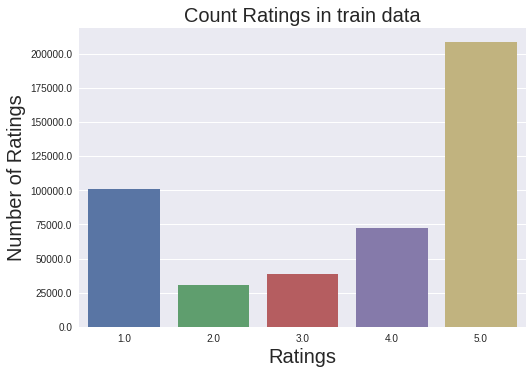

### Ratings per product

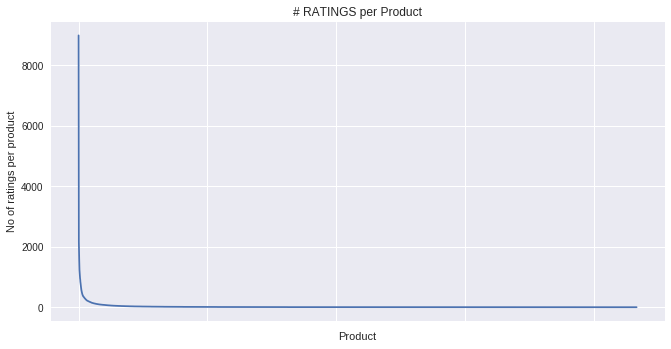

None

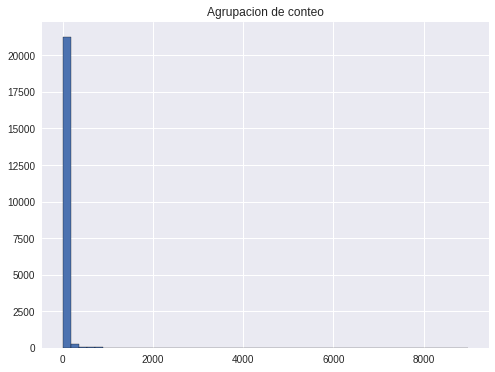

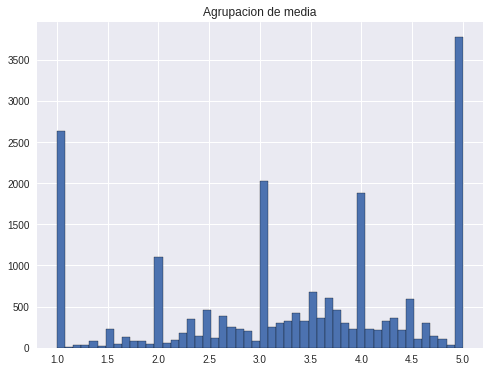

<Figure size 576x432 with 0 Axes>

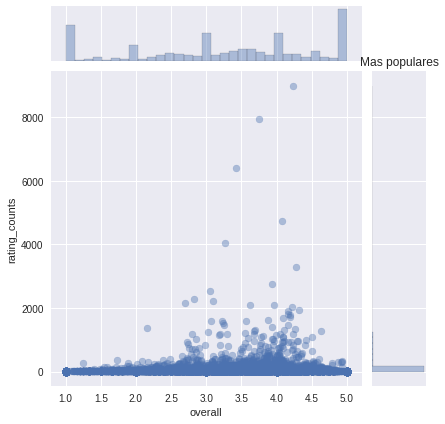

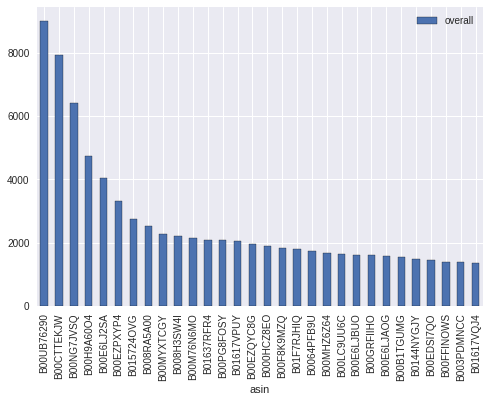

In [22]:
plot_review_stats(df_revs)

## Outliers
En las graficas se aprecia que hay outliers los cuales pueden afectar las recomendaciones de el modelo, procedemos a eliminar estos.

In [23]:
def remove_outliers(df, group_on='asin', num_col='overall', fun='count', threshold=3.):
    grp = df.groupby(group_on)[num_col]
    grp = grp.count() if fun == 'count' else grp.sum()
    z_vals = (grp - grp.mean()) / grp.std()
    idx = abs(z_vals) > threshold  # idx.index: str, idx.values: bool
    outlier_ids = idx[idx].index
    print(grp.describe())
    return df[~df.asin.isin(outlier_ids)]

In [24]:
%time df_no_outliers = remove_outliers(df_revs)

count    21663.000000
mean        20.799428
std        138.429587
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max       8994.000000
Name: overall, dtype: float64
CPU times: user 372 ms, sys: 0 ns, total: 372 ms
Wall time: 460 ms


<class 'pandas.core.frame.DataFrame'>
Int64Index: 285007 entries, 0 to 459435
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         285007 non-null  float64
 1   reviewerID      285007 non-null  object 
 2   asin            285007 non-null  object 
 3   reviewerName    284988 non-null  object 
 4   unixReviewTime  285007 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 13.0+ MB


None

'(n usuarios, n productos) = (240084, 21520)'

'valoraciones: 285007'

### Info ratings

count    285007.000000
mean          3.469266
std           1.650442
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

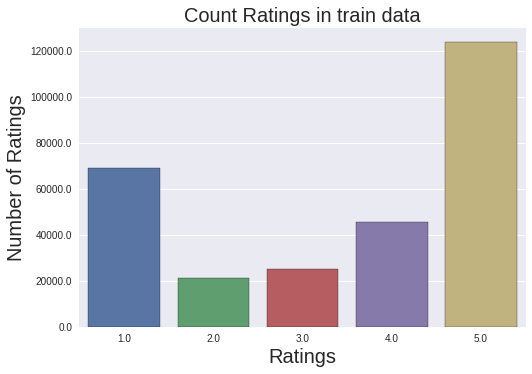

### Ratings per product

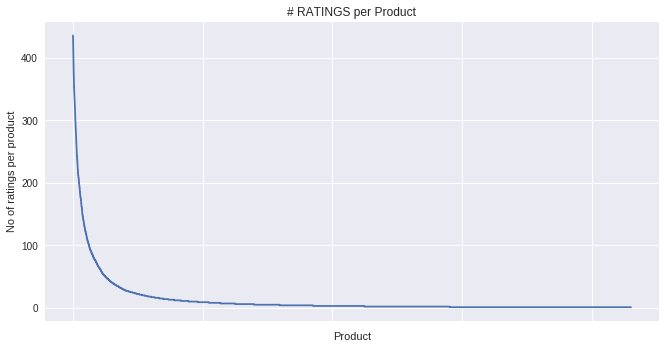

None

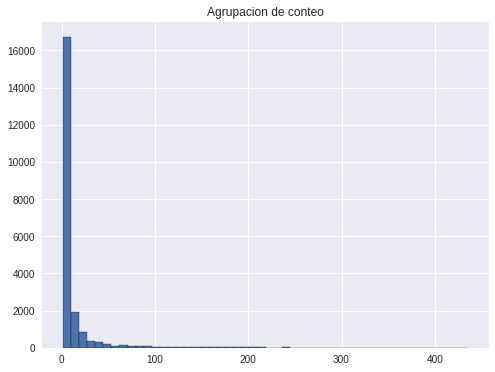

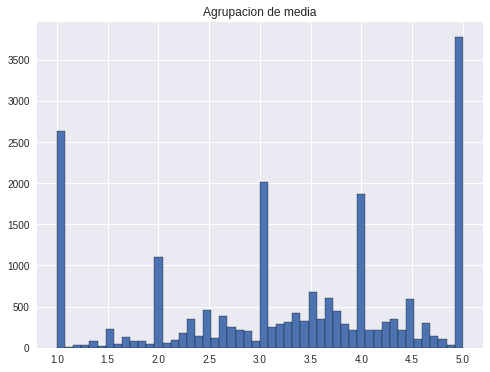

<Figure size 576x432 with 0 Axes>

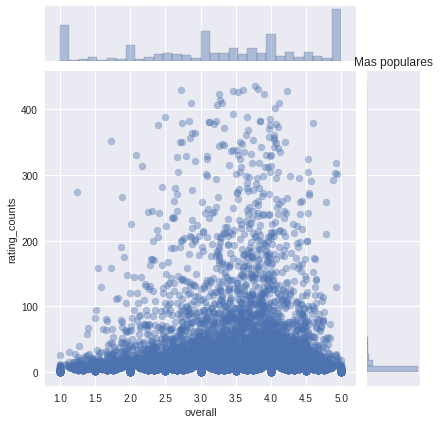

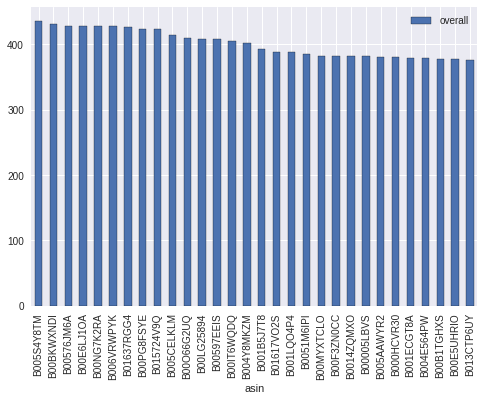

In [25]:
plot_review_stats(df_no_outliers)

#### Grafica de los productos donde al menos hay cinco valoraciones por usuario y producto 

In [26]:
def get_dense_df(df_review, at_least_n_users=5, at_least_n_items=5):
    filter_user = filter_by_freq(df_review, 'reviewerID', at_least_n_users)
    filter_item = filter_by_freq(df_review, 'asin', at_least_n_items)
    df_review_dense = df_review[filter_user & filter_item]

    print('shape comparison')
    print('df original: ', df_review.shape, 'df_dense: ', df_review_dense.shape)
    print('\n')
    
    return df_review_dense

shape comparison
df original:  (450578, 5) df_dense:  (21894, 5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21894 entries, 21 to 459415
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         21894 non-null  float64
 1   reviewerID      21894 non-null  object 
 2   asin            21894 non-null  object 
 3   reviewerName    21882 non-null  object 
 4   unixReviewTime  21894 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.0+ MB


None

'(n usuarios, n productos) = (3176, 4499)'

'valoraciones: 21894'

### Info ratings

count    21894.000000
mean         3.707363
std          1.474646
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

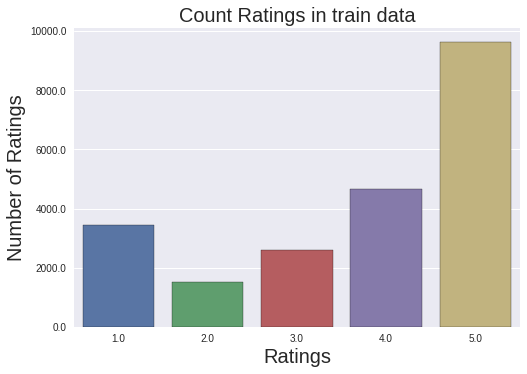

### Ratings per product

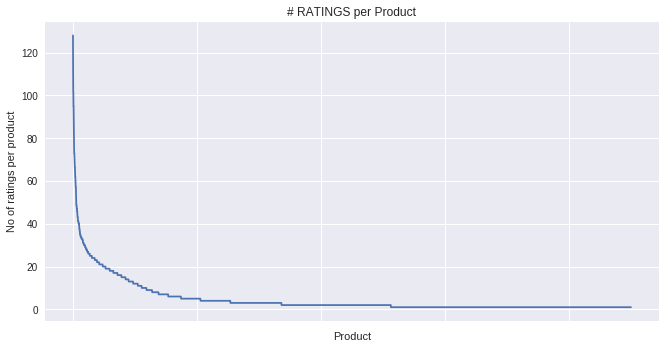

None

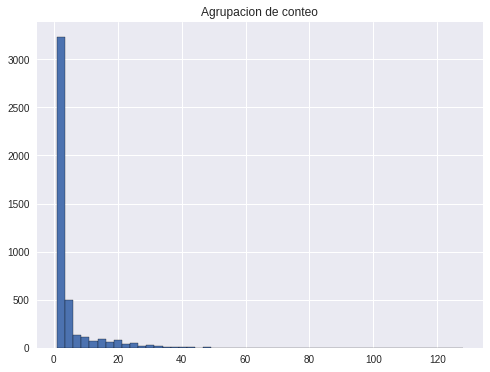

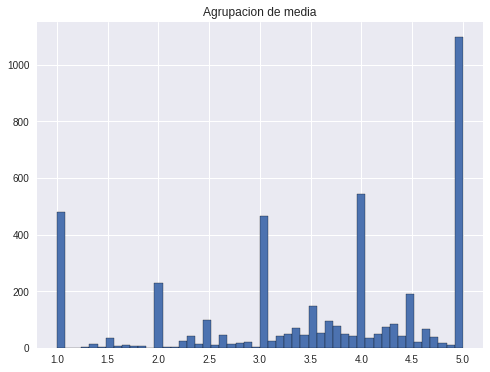

<Figure size 576x432 with 0 Axes>

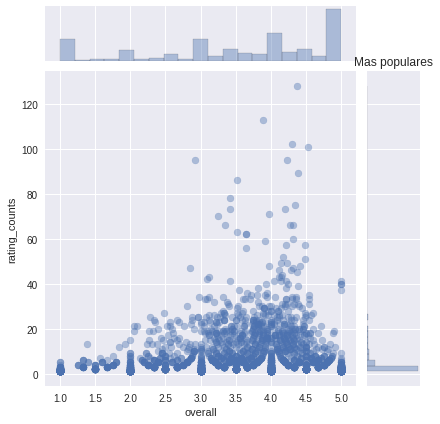

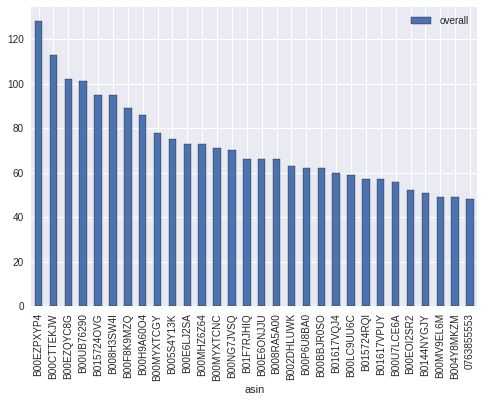

In [27]:
plot_review_stats(get_dense_df(df_revs))

#### Grafica de los productos donde al menos hay cinco valoraciones por usuario y producto sin outliers

shape comparison
df original:  (285007, 5) df_dense:  (13779, 5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13779 entries, 21 to 459415
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         13779 non-null  float64
 1   reviewerID      13779 non-null  object 
 2   asin            13779 non-null  object 
 3   reviewerName    13769 non-null  object 
 4   unixReviewTime  13779 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 645.9+ KB


None

'(n usuarios, n productos) = (1989, 3986)'

'valoraciones: 13779'

### Info ratings

count    13779.000000
mean         3.642572
std          1.476252
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

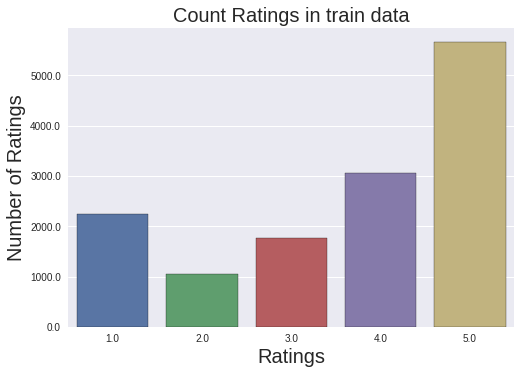

### Ratings per product

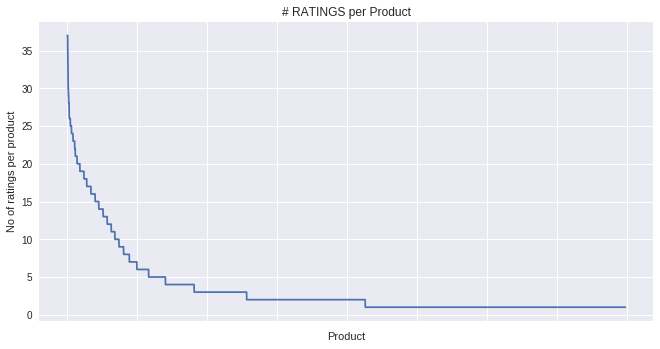

None

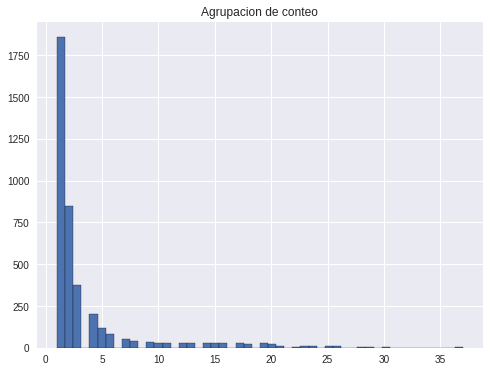

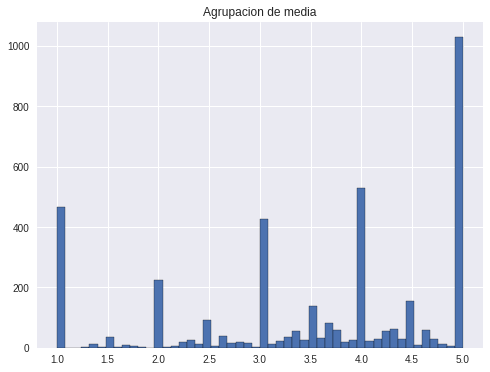

<Figure size 576x432 with 0 Axes>

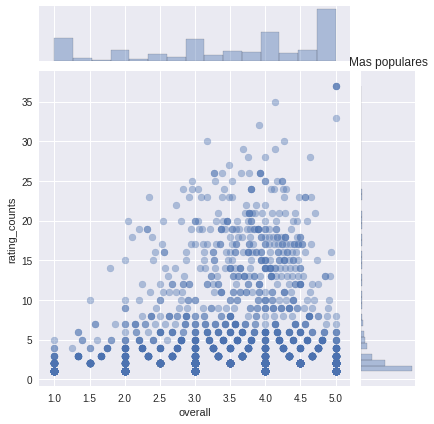

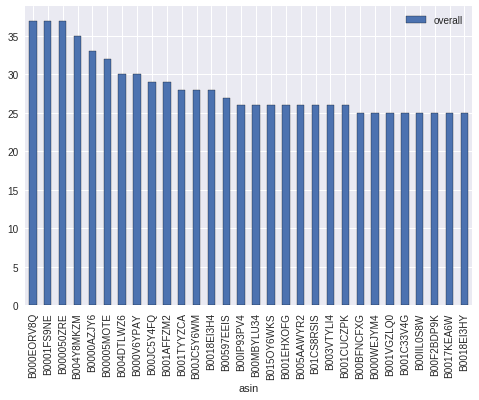

In [28]:
plot_review_stats(get_dense_df(df_no_outliers))

### Observacion
Hay inconsistencias en los archivos, pues en el meta no hay info de algunos elementos valorados. Se eliminaran estas valoraciones.

In [17]:
sum(~df_review_db.asin.isin(df_meta_db.asin))

1604

In [18]:
print(df_review_db.shape)
df_review_db = extract_rows_from_dense(df_review_db, df_meta_db, 'asin')

(23491, 5)


In [19]:
df_review_db.shape

(21887, 5)

## Creacion del modelo y serializacion

In [19]:
import surprise

from surprise.prediction_algorithms.knns import KNNBasic
from surprise.model_selection import KFold, GridSearchCV
from surprise.model_selection.split import train_test_split
from surprise.model_selection.validation import cross_validate

from surprise import accuracy, dump
from surprise import Dataset, Reader
from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline
from surprise import KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering

from collections import defaultdict

from  rec_utils import *

In [20]:
my_seed = 0
random.seed(my_seed)
np.random.seed(my_seed)

df_review_db.head()

overall      reviewerID        asin  reviewerName  unixReviewTime
21      4.0  A38NELQT98S4H8  0321719816     WB Halper      1287532800
22      4.0  A3QJU4FEN8PQSZ  0321719816        Grimmy      1287360000
23      5.0   ACJT8MUC0LRF0  0321719816     D. Fowler      1287187200
25      5.0   AYUF7YETYOLNX  0321719816  Bryan Newman      1286841600
26      5.0  A31ICLWQ9CSHRS  0321719816    Al Swanson      1286409600

In [21]:
cols = ['reviewerID', 'asin', 'overall']
trainset, testset = train_test_from_df(df_review_db, cols, test_size=0.2)

In [22]:
print(testset[0])

('A13AZS4ITQT7QJ', 'B000SAUFBG', 2.0)


In [23]:
sim_options = {'name': 'pearson', 'user_based': False}
algo = KNNBasic(sim_options=sim_options)
%time algo.fit(trainset=trainset)
preds = algo.test(testset)

# metrics
accuracy.mae(preds)
accuracy.rmse(preds)

Computing the pearson similarity matrix...
Done computing similarity matrix.
CPU times: user 330 ms, sys: 323 ms, total: 653 ms
Wall time: 649 ms
MAE:  1.1899
RMSE: 1.4555


1.4555473918720714

In [24]:
raw_uid = testset[0][0]
sims = algo.compute_similarities()

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [25]:
raw_iids = get_top_item_based(algo, raw_uid, trainset, sims)

In [37]:
testset[0], raw_iids

(('A13AZS4ITQT7QJ', 'B000SAUFBG', 2.0),
 ['B005FIWTHO',
  'B0053WX3AY',
  'B00EZPXYP4',
  'B00BFNCFZ4',
  'B0013QQWQG',
  'B0123C60EW',
  'B015724RQI',
  'B000HCZ8EO',
  'B00LC9UU6C',
  'B000X86ZAS'])

In [27]:
df_review_db[df_review_db.reviewerID == raw_uid].asin.values

array(['B000SAUFBG', 'B0013WO6QS', 'B004E9SKF0', 'B005EJ2J1K',
       'B00C79J0YE', 'B00005ICD3', 'B00008CQPH'], dtype=object)

In [29]:
predictions = algo.test(testset)

In [35]:
df_review_db.to_csv('./model/software_reviews.csv', index=False)

In [32]:
file_name = 'algo.model'
dump.dump('./model/' + file_name, algo=algo)

In [33]:
_, loaded_algo = dump.load('./model/' + file_name)
predictions_loaded_algo = loaded_algo.test(testset)
assert predictions == predictions_loaded_algo

In [ ]:
# aqui nos quedamos
raise

In [232]:
testrow = [x for x in testset if x[0] == 'A1TNHX64CD7QC8']
testrow

[('A1TNHX64CD7QC8', 'B0095CATEG', 5.0),
 ('A1TNHX64CD7QC8', 'B009ENDZ4C', 1.0),
 ('A1TNHX64CD7QC8', 'B00MV9ELBM', 1.0)]

In [218]:
# testset

In [208]:
idsocio = 'A31RULW0KNYJ5H'

# query = 'SELECT idSocio, idProducto, rating FROM valoracion WHERE idSocio = %s'
# cursor.execute(query, idsocio)
# data = pd.DataFrame(np.array([x for x in cursor.fetchall()]))
# display(data)
# _, test_set = train_test_split(Dataset.load_from_df(data, reader), test_size=1)

In [228]:
def top_n_from_uid(testrow):

    preds = algo.test(testrow)
    top_n = get_top_n(preds, n=10)
    iids = []
    for uid, user_ratings in top_n.items():
        iids = iids + [iid for (iid, est) in user_ratings]
    return iids

In [233]:
item_ids = top_n_from_uid(testrow)
item_ids

['B0095CATEG', 'B00MV9ELBM', 'B009ENDZ4C']

In [211]:
cursor.execute('desc producto')
attrs = [x[0] for x in cursor.fetchall()]
query = f"select {', '.join(attrs)} from producto where idProducto = %s"
for iid in item_ids:
    cursor.execute(query, iid)
    print(cursor.fetchall())
    


(('B00VUMB8V2', 'System Mechanic - 15 [Download]', 'IOLO Technologies', 44.96298689479438, 17),)


In [184]:
# Quietooo, no ejecutes la carga de datos en caso de correr todas las celdas
raise

RuntimeError: No active exception to reraise

## Carga de datos csv a la base de datos

In [34]:
from flask import Flask, render_template, request, jsonify
from flaskext.mysql import MySQL

In [35]:
app = Flask(__name__)
app.config.from_pyfile('config.py')

mysql = MySQL()
mysql.init_app(app)

conn = mysql.connect()
cursor = conn.cursor()

## Insercion en producto

In [227]:
query = f'''INSERT INTO producto(idProducto, nombre, marca, precioUnitario, idSubCat) 
        VALUES '''
n = df_meta_db.shape[0]
conn.begin()
for i, row in tqdm(df_meta_db.iterrows(), total=n):
    val = f""" ("{row['asin']}", "{row['title'].replace('"', '""')}", "{row['brand']}", {row['price']}, 17); """
    cursor.execute(query + val)

        
print(query + val)


100%|██████████| 4494/4494 [00:15<00:00, 284.62it/s]

INSERT INTO producto(idProducto, nombre, marca, precioUnitario, idSubCat) 
        VALUES  ("B01HAP3NJM", "CorelDRAW Home &amp; Student Suite X8 for PC (Old Version)", "Corel", 67.48, 17); 


In [228]:
# conn.rollback()
conn.commit()

In [229]:
df_review_db.head()

overall      reviewerID        asin  reviewerName  unixReviewTime
21      4.0  A38NELQT98S4H8  0321719816     WB Halper      1287532800
22      4.0  A3QJU4FEN8PQSZ  0321719816        Grimmy      1287360000
23      5.0   ACJT8MUC0LRF0  0321719816     D. Fowler      1287187200
25      5.0   AYUF7YETYOLNX  0321719816  Bryan Newman      1286841600
26      5.0  A31ICLWQ9CSHRS  0321719816    Al Swanson      1286409600

In [230]:
df_review_db.reviewerID.value_counts()

A5JLAU2ARJ0BO     72
A680RUE1FDO8B     67
A3W4D8XOGLWUN5    66
A225G2TFM76GYX    66
A15S4XW3CRISZ5    64
                  ..
A1SRMG16HF5TLD     5
A2T4T4U20V7HSO     5
A2U80U8KAR1DL      5
A1FW6NVKN9B9VH     5
A10M0GF5ZFODYU     5
Name: reviewerID, Length: 3176, dtype: int64

In [231]:
df_review_db.reviewerID.apply(len).max()

20

In [232]:
df_review_db.reviewerName.map(str).apply(len).max()  # there's a float over there...

66

In [233]:
df_review_name.unixReviewTime.map(str).map(len).max()

10

## Insercion en socio

In [234]:
query = f'''INSERT INTO socio(idSocio, nombre) 
        VALUES '''
n = df_review_name.shape[0]
conn.begin()
for i, row in tqdm(df_review_name.iterrows(), total=n):
    val = f""" ("{row['reviewerID']}", "{str(row['reviewerName']).replace('"', '""')}"); """
    cursor.execute(query + val)


100%|██████████| 3176/3176 [00:06<00:00, 512.39it/s]

INSERT INTO socio(idSocio, nombre) 
        VALUES  ("A30W19MJFRJE3J", "Tahoe Johnny"); 


In [235]:
#conn.rollback()
conn.commit()


In [258]:
query = f'''INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES '''
n = df_review_db.shape[0]
conn.begin()
for i, row in tqdm(df_review_db.iterrows(), total=n):
    val = f""" ("{row['reviewerID']}", "{row['asin']}", {row['overall']}, {row['unixReviewTime']} ); """
#     print(query + val)
    cursor.execute(query + val)
    
        



  0%|          | 0/21887 [00:00<?, ?it/s]

  0%|          | 1/21887 [00:00<48:12,  7.57it/s]

  0%|          | 65/21887 [00:00<33:49, 10.75it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A38NELQT98S4H8", "0321719816", 4.0, 1287532800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3QJU4FEN8PQSZ", "0321719816", 4.0, 1287360000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ACJT8MUC0LRF0", "0321719816", 5.0, 1287187200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AYUF7YETYOLNX", "0321719816", 5.0, 1286841600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A31ICLWQ9CSHRS", "0321719816", 5.0, 1286409600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2BVNVJOFXGZUB", "0321719816", 5.0, 1285459200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2JMJVNTBL7K7E", "0321719816", 5.0, 1302134400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



  1%|          | 196/21887 [00:00<23:37, 15.30it/s]

  1%|          | 254/21887 [00:00<16:40, 21.61it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2AGUG8B7T7DP4", "B000021Z1O", 5.0, 1416441600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A21H4R2TIHTYXL", "B000021Z1O", 5.0, 1392681600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3A2RMW9SQS60B", "B000023VV2", 5.0, 1082160000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A30H2335OM7RD6", "B000023VV2", 5.0, 1053043200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ATD2TKJE84XRM", "B000023VVY", 5.0, 968284800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3A2RMW9SQS60B", "B000023VVY", 5.0, 1043452800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3MVMPFBN1RFFV", "B000023VVH", 5.0, 1105747200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



  2%|▏         | 348/21887 [00:00<11:48, 30.38it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AR2DE47VCY1C8", "B00004W62P", 4.0, 989971200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2IE7YPWUYZAXS", "B00004W62P", 5.0, 980294400 ); 




  2%|▏         | 401/21887 [00:01<09:46, 36.62it/s]

  2%|▏         | 494/21887 [00:01<06:55, 51.44it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AB10W5FUXWAJ", "B00004W62P", 4.0, 971827200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AT2BYFEVLVITT", "B00004W62P", 3.0, 966470400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AT2BYFEVLVITT", "B00004W62O", 3.0, 966470400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1LCS3WQEWUO6Y", "B00004W62O", 5.0, 1225411200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A20DZX38KRBIT8", "B00004W62O", 1.0, 1210291200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A16UJ76AFPJGEX", "B00004W62O", 1.0, 1155427200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AE95Z3K6GVIC3", "B00004W62O", 1.0, 1001635200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUE



  3%|▎         | 550/21887 [00:01<05:17, 67.11it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AP1X4VT8Y05WR", "B00005IB4S", 5.0, 1288656000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AT6CZDCP4TRGA", "B00005JAFF", 1.0, 1039564800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1HJYR6KFWM6BV", "B00005JAFF", 5.0, 1013212800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A7VJYLSBBRU3B", "B00005JAFF", 5.0, 1003622400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AV3DZX3NU7NWU", "B00005JAFF", 3.0, 999993600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ARCGVYBD46M70", "B00005JD6L", 1.0, 1380326400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3W4D8XOGLWUN5", "B00005JD6L", 4.0, 1090800000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VAL



  3%|▎         | 596/21887 [00:01<03:56, 89.84it/s]

  3%|▎         | 709/21887 [00:01<02:51, 123.60it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3A8ZWV1PQWXK5", "B00005LVWL", 4.0, 1060041600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2J5Y9MKKQTXGW", "B00005LVWL", 5.0, 1056412800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2EGK0YRDF4ZZB", "B00005LVWL", 3.0, 1049587200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A5JLAU2ARJ0BO", "B00005LVWI", 5.0, 1003363200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A25X9UHYFE3TXD", "B00005LVWI", 3.0, 1001116800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1C9C1QOQB94RT", "B00005M0IE", 5.0, 1013472000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A35KD1U1M387I0", "B00005MAFJ", 2.0, 1032220800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



  4%|▎         | 771/21887 [00:02<02:13, 158.70it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A14HVSVLNNALOD", "B00005S8HS", 5.0, 1020556800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A39G26LKBXB83D", "B00005S8HS", 1.0, 1013385600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A39G26LKBXB83D", "B00005S8HR", 1.0, 1013040000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2C27IQUH9N1Z", "B00005TQ1H", 4.0, 1018742400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A32GW1R9MW0XOH", "B00005S8KN", 2.0, 1013904000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2NOZB6VZCTOI4", "B00005TS6G", 4.0, 1069891200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1522TN5FVJL0Y", "B00005TS6G", 5.0, 1032912000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



  4%|▍         | 829/21887 [00:02<01:49, 192.67it/s]

  4%|▍         | 882/21887 [00:02<01:28, 237.77it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2EGK0YRDF4ZZB", "B000066ST3", 5.0, 1057795200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2J5Y9MKKQTXGW", "B000066ST3", 4.0, 1056585600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1P4RH7KMJ1SV2", "B000066ST3", 5.0, 1032048000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3GQKB1KF0CRPE", "B000067G68", 5.0, 1030147200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1IIX7TMCXWHQ1", "B000067PPR", 5.0, 1447632000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2F2S1L61X1LA9", "B000068NNP", 4.0, 1112832000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A35KD1U1M387I0", "B000068NNP", 5.0, 1032220800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
     



  4%|▍         | 955/21887 [00:02<01:19, 264.08it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A25D5KUNNATXUE", "B00006J3FM", 3.0, 1039824000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1MD9AEU9C4WJN", "B00006J3FM", 2.0, 1036886400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3NG3IWQSNNMHD", "B00006J3FM", 4.0, 1033862400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2OIXM5GEIAWD1", "B00006J09R", 5.0, 1114819200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3NG3IWQSNNMHD", "B00006JT8L", 5.0, 1033862400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3VTCY2W6MA6AW", "B00006JT86", 5.0, 1033776000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A32KAMWV31JB5O", "B00006JO4G", 1.0, 1070755200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
     



  5%|▍         | 1048/21887 [00:02<01:01, 336.26it/s]

  5%|▌         | 1133/21887 [00:02<00:50, 410.61it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1YT4N9BTN1YMH", "B00006UNSQ", 1.0, 1043107200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1EMDSTJDUE6B0", "B00006ULHT", 5.0, 1039392000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2IE7YPWUYZAXS", "B00006ULHT", 3.0, 1038700800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1DZ0ATGUNGWFV", "B00006ULHT", 1.0, 1047254400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A12VF2H2CWKQGQ", "B00006ULHT", 1.0, 1047168000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A5JLAU2ARJ0BO", "B00006ULHT", 1.0, 1045958400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1GOKUUDRB63FQ", "B00006ULHT", 1.0, 1044489600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



  5%|▌         | 1201/21887 [00:02<00:46, 447.91it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3GQKB1KF0CRPE", "B0000AOWWQ", 5.0, 1062979200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2LEIANN1UZTHP", "B0000AOWWQ", 4.0, 1346112000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3MVMPFBN1RFFV", "B0000AQPTB", 5.0, 1134604800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3FVAWZNKW9GX", "B0000AZJVB", 5.0, 1126915200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A14JBDSWKPKTZA", "B0000AZJV9", 5.0, 1074124800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A15S4XW3CRISZ5", "B0000AZJV9", 4.0, 1069718400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1C9C1QOQB94RT", "B0000AZJV9", 4.0, 1065052800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



  6%|▌         | 1266/21887 [00:02<00:44, 466.49it/s]

  6%|▌         | 1327/21887 [00:03<00:49, 414.58it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3IPSECQAUAT8V", "B0000E2RP9", 4.0, 1096934400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3TUZOJZM9008Y", "B0000E6NK9", 5.0, 1065830400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3NM0RAYSL6PA8", "B0000E6NK9", 5.0, 1065744000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A38GV4NYIIEWD4", "B0000E6NK9", 5.0, 1433116800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A8DTGSLA92T69", "B0000E6NK9", 5.0, 1404950400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A5FS50VW0GWEE", "B0000E6NK9", 5.0, 1110499200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2Q1EJXUAN61X5", "B0000E6NK9", 1.0, 1103587200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



  6%|▋         | 1380/21887 [00:03<00:48, 426.84it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3LWYQ7AX3YQR6", "B0001FS9NE", 5.0, 1324857600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AR7RVZZQDW6B3", "B0001FS9NE", 5.0, 1323043200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1R4830GBU8UIM", "B0001FS9NE", 5.0, 1313107200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1NHNED4X7LXRE", "B0001FS9NE", 5.0, 1278892800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1E7YKRTB8VYUG", "B0001FS9NE", 5.0, 1274572800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2U5308V40Z4OK", "B0001FS9NE", 5.0, 1269129600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1WBZA4OM02MXU", "B0001FS9NE", 5.0, 1264464000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



  7%|▋         | 1467/21887 [00:03<00:41, 489.70it/s]

  7%|▋         | 1530/21887 [00:03<00:38, 524.47it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A77MXWK83IYD0", "B00025O87E", 4.0, 1153785600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AAKQTXS4JOUR5", "B00025O87E", 4.0, 1140652800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2JRDFIGWTX50J", "B00025O87E", 1.0, 1140566400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A11L5M4MJP00UW", "B00025O87E", 4.0, 1117238400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2Z9H86XRXBVEI", "B00025O87E", 1.0, 1108684800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A175GQ20LIYO6X", "B00025O87E", 1.0, 1104451200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2GPILDZSIJKYH", "B0002664K2", 5.0, 1219622400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



  7%|▋         | 1590/21887 [00:03<00:39, 508.06it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2IIZ25SZSQGCC", "B0002QNDKG", 1.0, 1100131200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3IXXWSTNWCS4G", "B0002QNDKG", 5.0, 1121212800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A7VJYLSBBRU3B", "B0002RQ0WS", 4.0, 1147132800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3BL87QHIEQ1NE", "B0002RQ0WS", 1.0, 1140480000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A15S4XW3CRISZ5", "B0002RQ442", 3.0, 1096502400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3VL4RXCWNSR3H", "B0002RQ442", 1.0, 1127347200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2AV7Q95QGPTO0", "B0002RQ442", 1.0, 1116806400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



  8%|▊         | 1646/21887 [00:03<00:54, 368.28it/s]

  8%|▊         | 1840/21887 [00:03<00:41, 480.02it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1XNWOV39TF50P", "B0002T8812", 2.0, 1117065600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3I2CIYFESJL0V", "B0002UCSKI", 1.0, 1153008000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AYNAH993VDECT", "B0002UCSKI", 2.0, 1136332800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A5X444UZBWXW2", "B0002UCSKI", 5.0, 1128816000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AIGDECC1J99QT", "B0002UCSKI", 1.0, 1128556800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A356JAJSFPFB5P", "B0002UCSKI", 1.0, 1125273600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1KD8NJPZ01R37", "B0002UCSKI", 2.0, 1124668800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



  9%|▉         | 1940/21887 [00:04<00:37, 528.06it/s]

  9%|▉         | 2018/21887 [00:04<00:34, 572.38it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ABI9ODPTVFP6F", "B0009Z3NZK", 4.0, 1190332800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ARK5SAGVLW3FY", "B0009ZHG44", 2.0, 1129593600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3FGJDBSMCSG7G", "B000A0S6BA", 5.0, 1126483200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2PMR2PIGWKCQ9", "B000A40W4A", 5.0, 1136332800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AI290A0Z9Y3XF", "B000A6M8QI", 5.0, 1127865600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AYJF535SFBGXO", "B000A6M8QI", 5.0, 1127520000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A13BTMCSLTQ48R", "B000A6M8QI", 5.0, 1283817600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V



 10%|▉         | 2100/21887 [00:04<00:31, 629.32it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AKWN3BMRKC4AP", "B000B7TBNE", 5.0, 1383177600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3RLYQVZVE8HKQ", "B000B7TBNE", 4.0, 1272585600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A147YNOIN9Q36P", "B000B7TBNE", 5.0, 1167782400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1N0HXWQLD9OQX", "B000B85AAG", 1.0, 1250121600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A225G2TFM76GYX", "B000B85AAG", 3.0, 1241481600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A243Q4NB4IZHX8", "B000B8LX16", 1.0, 1140739200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A6U423ORF4SZL", "B000B8K7SG", 5.0, 1373673600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 10%|▉         | 2178/21887 [00:04<00:32, 600.78it/s]

 10%|█         | 2261/21887 [00:04<00:30, 633.95it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A39O4B6IUNYTT8", "B000BX7GAI", 5.0, 1205539200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3I0B42BE8ABQ5", "B000BX7GAI", 4.0, 1199232000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3EPJSPH03AS29", "B000BX5IKI", 4.0, 1234051200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A6FIAB28IS79", "B000BX7GAI", 3.0, 1194220800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A22K08WPR5LLJO", "B000BX5IKI", 5.0, 1216857600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3MG0KR2S2WV3M", "B000BX7GIA", 3.0, 1194220800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AUWS4WEQ3GS53", "B000BX7GIA", 3.0, 1191196800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 11%|█         | 2333/21887 [00:04<00:44, 435.08it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A29HT9J9U4QPV5", "B000FJSA2G", 5.0, 1208044800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1RQYQO7CLYV54", "B000FK88JK", 5.0, 1193356800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A8DTGSLA92T69", "B000FK88JK", 5.0, 1447718400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2R6BH43MXWLHZ", "B000FK88JK", 5.0, 1425772800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A10P8UG177H2XR", "B000FK88JK", 5.0, 1412035200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3S1YIQQW7AZO", "B000FK88JK", 4.0, 1218672000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A33B44XPTW0WOA", "B000FK88JK", 1.0, 1208304000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 11%|█         | 2391/21887 [00:04<00:42, 463.63it/s]

 11%|█▏        | 2472/21887 [00:05<00:37, 511.49it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2WLDEORTNRY0D", "B000FQVXG4", 1.0, 1198713600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2EY1MSMXO6LQ", "B000FQVXG4", 1.0, 1183334400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AR9Q9QFL9669M", "B000FQVXG4", 5.0, 1182643200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A680RUE1FDO8B", "B000FQVXG4", 1.0, 1164844800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2AKUILFODESR0", "B000FQVXG4", 2.0, 1156377600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A39OM050G38BRN", "B000FRTTVY", 5.0, 1156809600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AYZFTEXUQQHZJ", "B000FRTTVY", 1.0, 1189728000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V



 12%|█▏        | 2532/21887 [00:05<00:36, 534.49it/s]

 12%|█▏        | 2597/21887 [00:05<00:37, 513.73it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AUVOMF6CMI4O6", "B000HCTYTO", 1.0, 1383782400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2CDM45LL7S5XR", "B000HCTYTO", 1.0, 1206230400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2MYTY15IFSP3G", "B000HCTY2G", 2.0, 1185580800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A8LIC48AXFIZB", "B000HCTYTO", 1.0, 1202169600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AMWL7XIWIPXEZ", "B000HCTYTO", 5.0, 1189728000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3T1S9ZTHNLVJY", "B000HCTYTO", 1.0, 1188432000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A74TA8X5YQ7NE", "B000HCTYTO", 1.0, 1183939200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V



 12%|█▏        | 2653/21887 [00:05<00:39, 481.02it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A5MXNEKQSVHEG", "B000HCVR30", 1.0, 1176249600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AN0BBYINL5ZL7", "B000HCVR30", 1.0, 1173744000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1IF2GNES3L2HC", "B000HCXKJY", 1.0, 1211587200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ARM94O2HRBZCF", "B000HCXKJY", 5.0, 1200873600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AIB3GIVAGTUJG", "B000HCXKJY", 5.0, 1197244800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A39KFTH8S609TZ", "B000HCXKJY", 1.0, 1193702400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A20S4G1EXF2OM7", "B000HCXKJY", 3.0, 1187049600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V



 12%|█▏        | 2705/21887 [00:05<00:43, 442.62it/s]

 13%|█▎        | 2788/21887 [00:05<00:37, 514.32it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3H4TIVTTA5IBB", "B000HCTYTE", 4.0, 1198108800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AIB3GIVAGTUJG", "B000HCTYTE", 4.0, 1197244800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ADZBYWQS2LO40", "B000HCTYTE", 1.0, 1196899200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A39O4B6IUNYTT8", "B000HCTYTE", 2.0, 1194048000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A39KFTH8S609TZ", "B000HCTYTE", 1.0, 1193702400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A176Y7DNY6H2DN", "B000HCTYTE", 2.0, 1186876800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AUL58GNT5L7H1", "B000HCTYTE", 1.0, 1184284800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AHD66U9MG0MKI", "B000I8FADG", 1.0, 1397433600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A11KZ906QD08C5", "B000I8FADG", 3.0, 1151971200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3R74EHB34JTTP", "B000I8FADG", 2.0, 1097539200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A37IHRVO8JWYF2", "B000I8FADG", 4.0, 1050537600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1IU7S4HCK1XK0", "B000I8FADG", 4.0, 1031270400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1TNHX64CD7QC8", "B000I84DSY", 1.0, 1174262400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2PMR2PIGWKCQ9", "B000I84DUM", 5.0, 1188691200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 13%|█▎        | 2847/21887 [00:06<01:04, 294.11it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AYZFTEXUQQHZJ", "B000IAOIXW", 5.0, 1190246400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A26U6SA7ME4CIB", "B000IAOIXW", 1.0, 1190160000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2K3D4H7FEM2GG", "B000IAOIXW", 1.0, 1187481600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("APLAYRDGF11H2", "B000IAOIXW", 1.0, 1187481600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AITDAGXGMCSEZ", "B000IAOIXW", 1.0, 1187395200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A4QBJJ9YC59WE", "B000IAOIXW", 5.0, 1172361600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3IPSECQAUAT8V", "B000IAOIXW", 1.0, 1167782400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V



 13%|█▎        | 2893/21887 [00:06<01:03, 297.21it/s]

 13%|█▎        | 2937/21887 [00:06<00:57, 328.55it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AYVKIW30H8508", "B000JX3N02", 1.0, 1164067200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1OW5M4JTNG715", "B000JX7GXM", 5.0, 1381017600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3VD8FX72IO7NI", "B000JX5JGI", 5.0, 1451865600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ARA7E7J84HCKA", "B000JX5JGI", 5.0, 1443052800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ALWRLDJ6P5IHE", "B000JX5JGI", 5.0, 1440633600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ARBQMFUIBRMWY", "B000JX5JGI", 5.0, 1404604800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A34NQ4MVWX07F9", "B000JX5JGI", 5.0, 1392595200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V



 14%|█▎        | 2979/21887 [00:06<00:57, 330.51it/s]

 14%|█▍        | 3019/21887 [00:06<00:56, 331.09it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3R74EHB34JTTP", "B000NA780M", 2.0, 1197676800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AMUP8DYE7EAN2", "B000NA780M", 3.0, 1192233600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2CL818RN52NWN", "B000NA780M", 1.0, 1188432000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AE0QPOQX3ZXP0", "B000NA780M", 1.0, 1183420800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A13IZS4ZCYXOOI", "B000NA780M", 5.0, 1181520000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2TTHN1UMO82VY", "B000NA780M", 5.0, 1175990400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A20S4G1EXF2OM7", "B000NA780M", 2.0, 1175817600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 14%|█▍        | 3088/21887 [00:06<00:49, 376.23it/s]

 14%|█▍        | 3131/21887 [00:06<00:48, 388.84it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AS2Y87PQD780D", "B000QWAPJ8", 5.0, 1397001600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2K0GQHRYBV5SA", "B000R99IFC", 5.0, 1406073600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AS2Y87PQD780D", "B000R99IFC", 5.0, 1397001600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2NYCHZ7MZ3OU3", "B000R99IFC", 5.0, 1391817600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AS2Y87PQD780D", "B000R9BNO6", 5.0, 1397001600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2NYCHZ7MZ3OU3", "B000R9BNO6", 5.0, 1391817600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A68I93HI9W6LD", "B000RAASFK", 1.0, 1185667200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V



 15%|█▍        | 3174/21887 [00:07<01:01, 304.96it/s]

 15%|█▍        | 3222/21887 [00:07<00:54, 341.35it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A26U6SA7ME4CIB", "B000T9LUBU", 1.0, 1195344000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("APEQGP42031FP", "B000T9LUBU", 4.0, 1194998400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ATYSC1ML56W1J", "B000T9LUBU", 5.0, 1194307200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A35FUTUSVXQ5PD", "B000T9LUBU", 4.0, 1193270400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1FI11RM530AV5", "B000T9LUBU", 1.0, 1193097600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3Q7LVUP45XLUZ", "B000T9LUBU", 3.0, 1191110400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2GNQ4SBVD0PKN", "B000TFA08S", 4.0, 1194220800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 15%|█▍        | 3278/21887 [00:07<00:51, 363.86it/s]

 15%|█▌        | 3326/21887 [00:07<00:47, 392.14it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2OIF6ZL17EQSM", "B000U819A2", 5.0, 1212537600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2DHUPMRND0A2S", "B000U819A2", 5.0, 1209772800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1HY0YAGTZMIOD", "B000U819A2", 1.0, 1206576000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AT1AXMJ3V02W", "B000U819A2", 1.0, 1203033600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2UOHALGF2X77Q", "B000U819A2", 5.0, 1201478400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ACUYXGCMWVF7S", "B000U818N0", 5.0, 1189468800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A8WEXFRWX1ZHH", "B000U818N0", 4.0, 1189382400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V



 16%|█▌        | 3394/21887 [00:07<00:41, 449.14it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2X3L31KCXBHCL", "B000V6YPAY", 3.0, 1205280000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1QOK9LU90ACF7", "B000V6YPAY", 4.0, 1202342400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1CZ14RN06DK0I", "B000V809MK", 1.0, 1207180800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3V8Q3VBKI0TM7", "B000V809MK", 2.0, 1202515200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AGTO21BHY08LF", "B000V7V2UE", 1.0, 1197676800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AO5DDG05DHVIC", "B000V9YXJ4", 3.0, 1214956800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ACZ4YI6UWRVOG", "B000V9YXJ4", 5.0, 1208390400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 16%|█▌        | 3445/21887 [00:07<00:44, 411.57it/s]

 16%|█▋        | 3576/21887 [00:07<00:35, 517.51it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A85WY5ZDT8GXW", "B000W3RSGE", 1.0, 1202428800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ACVD5BXOEKRO1", "B000W3RSGE", 4.0, 1202428800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AD406JFNIV3MY", "B000W3RSGE", 4.0, 1201046400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A9STHX3JV9O4N", "B000W3RSGE", 5.0, 1200960000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3F8WHBAMXTL8W", "B000W3RSGE", 1.0, 1200700800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1JWSDDIH5Z7DV", "B000W3RSGE", 5.0, 1199664000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1HJYR6KFWM6BV", "B000W3RSGE", 5.0, 1199318400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V



 17%|█▋        | 3647/21887 [00:07<00:38, 479.27it/s]

 17%|█▋        | 3718/21887 [00:08<00:34, 530.60it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2YO5JDPKQKHU7", "B000X86ZAS", 2.0, 1203724800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A204K1OFE8OB9Y", "B000X86ZAS", 1.0, 1202428800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1E0XB78OUMY2T", "B000X86ZAS", 1.0, 1200787200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AZBXKUH4AIW3X", "B000XB21JY", 4.0, 1377561600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3G5C3JE30FP89", "B000XB21JY", 3.0, 1355788800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2KMV056844YV2", "B000XB21JY", 5.0, 1217203200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A7R79JLQ5Q28M", "B000XHE0Q0", 4.0, 1205798400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A9STHX3JV9O4N", "B0013A5GGE", 5.0, 1218240000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A11KZ906QD08C5", "B0013A5GGE", 4.0, 1216252800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1P4RH7KMJ1SV2", "B0013A5GGE", 4.0, 1216252800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3V6Z4RCDGRC44", "B0013A5GGE", 5.0, 1215820800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3D2VIUT2HWP0Z", "B0013A5GGE", 4.0, 1215734400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1WSFHRBY2ZD1R", "B0013A5GGE", 5.0, 1215648000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AQ9JTZBF30IW0", "B0013A5GGE", 4.0, 1215648000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 17%|█▋        | 3783/21887 [00:08<00:56, 322.85it/s]

 18%|█▊        | 3836/21887 [00:08<00:50, 359.57it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1SHHQSPOWR00F", "B0013O98SW", 1.0, 1234483200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1KGKPWWG61U42", "B0013O98SW", 5.0, 1220745600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3QJU4FEN8PQSZ", "B0013OAHTG", 3.0, 1249344000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A26LQSC65AMTGK", "B0013OAHTG", 4.0, 1240444800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3VL4RXCWNSR3H", "B0013OAHTG", 1.0, 1235347200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AE12AEJFCOGGY", "B0013OAHTG", 1.0, 1228348800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A240FRPD4MEXND", "B0013OAHTG", 3.0, 1220659200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 18%|█▊        | 3941/21887 [00:08<00:43, 413.57it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A29QCPFDSDNNKQ", "B0014X2UAK", 1.0, 1254268800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3D8NAHCHRROXP", "B0014X2UAK", 5.0, 1241740800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2UWPPU5GZLMQZ", "B0014X2UAK", 4.0, 1234051200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AJPH8OQSWKR7K", "B0014X2UAK", 5.0, 1232409600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A33XMCG1UFDSY2", "B0014X4O7C", 3.0, 1372377600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AW3VZ5O895LRK", "B0014X4O7C", 4.0, 1250985600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2XHUR8JIYJ06B", "B0014X4O7C", 5.0, 1243296000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 18%|█▊        | 3995/21887 [00:08<00:45, 389.29it/s]

 19%|█▊        | 4053/21887 [00:08<00:42, 417.98it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3847AOEXWW7FI", "B0018EI3I8", 5.0, 1233273600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2A4JHPH6I0ESB", "B0018EI3I8", 3.0, 1232755200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2UTLQ8SE3W4ZJ", "B0018EI3I8", 5.0, 1231286400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1JAQH5B0PV61N", "B0018EI3I8", 5.0, 1226793600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A57Q87B0TC9IJ", "B0018EI3I8", 1.0, 1224374400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1L39B3I6KC7M2", "B0018EI3HY", 4.0, 1226188800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3QU3O79AGNWCY", "B0018EI3HY", 4.0, 1226016000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1GWG5CWLKJ7ET", "B001AFCWBO", 5.0, 1221264000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1RIQUDE4B8NGX", "B001AFFRM0", 5.0, 1221264000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AYMD77ITD15PT", "B001AFD8XK", 4.0, 1221436800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AGZEK96T7WK6", "B001AFD8XK", 5.0, 1221264000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1GWG5CWLKJ7ET", "B001AFD8XK", 4.0, 1221264000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A39OM050G38BRN", "B001AFD8XK", 5.0, 1220745600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3P8ZDHC7XSKSE", "B001AFFRM0", 4.0, 1253750400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 19%|█▊        | 4102/21887 [00:09<00:57, 307.15it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1HOLJW15Q5S5V", "B001AFD8XK", 5.0, 1229558400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A24B990VP9QC6C", "B001AFD8XK", 5.0, 1227571200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2ZJMLZ1IA2YA9", "B001AFD8XK", 5.0, 1226361600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1C760KGFSRI6F", "B001AFD8XK", 5.0, 1225584000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A31HE83MU98GBV", "B001AFD8XK", 5.0, 1224633600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A316XO4RWX21YN", "B001AFD8XK", 5.0, 1224115200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AE12AEJFCOGGY", "B001AFD8XK", 5.0, 1222992000 ); 




 19%|█▉        | 4142/21887 [00:09<01:17, 228.86it/s]

 19%|█▉        | 4221/21887 [00:09<01:01, 289.41it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A14ENWEKTHCBXR", "B001AFD8XK", 5.0, 1222646400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3I92N6EHQI3IP", "B001AFD8XK", 5.0, 1222041600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2PBMCBT1R8TTL", "B001AFD8XK", 5.0, 1221868800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1V4QK4OE1A0QS", "B001AFD8XK", 5.0, 1221696000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2J8DE8R94ZB02", "B001AFD8XK", 5.0, 1221696000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ASQK4UT56QBTI", "B001AFFRM0", 5.0, 1224115200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2J8DE8R94ZB02", "B001AFFRM0", 5.0, 1221696000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 20%|█▉        | 4277/21887 [00:09<01:06, 264.42it/s]

 20%|██        | 4395/21887 [00:09<00:53, 328.44it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AJNU53DSIMQFC", "B001C31P4Y", 5.0, 1247443200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3KZCNV1N8R9GC", "B001C31P4Y", 3.0, 1242864000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AE12AEJFCOGGY", "B001C31P4Y", 2.0, 1240444800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1GPVV2XWNGSDX", "B001C31P4Y", 5.0, 1233705600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3L2KYOYDWSRPL", "B001C31P4Y", 4.0, 1231891200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2QQEURPB1VQF7", "B001C31P4Y", 5.0, 1230768000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A13MKSASQ6YWL7", "B001C31P4Y", 3.0, 1229904000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 20%|██        | 4455/21887 [00:10<00:47, 370.25it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3KDRLIBWILPMJ", "B001CU9ILE", 5.0, 1235174400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1F2EYORWOZ3G1", "B001CUCZPK", 5.0, 1231027200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AMO1MLSIJSQOF", "B001CUCZPK", 5.0, 1230940800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AI19TV79W9HKQ", "B001CUCZPK", 4.0, 1230249600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A8G2W3PNBM0R2", "B001CUCZPK", 5.0, 1247788800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3VL4RXCWNSR3H", "B001CUCZPK", 5.0, 1241049600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ALVYD6HBLYI0W", "B001CUCZPK", 2.0, 1234137600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V



 21%|██        | 4506/21887 [00:10<01:37, 178.96it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("APEQGP42031FP", "B001D1TEIE", 2.0, 1228262400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A24OVLPXPGS1V3", "B001D1TEIE", 2.0, 1226793600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AILSYXK4YFADX", "B001D1TEIE", 4.0, 1224979200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1QT6PHXDA5XDF", "B001D1TEIE", 5.0, 1222992000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1OMXVXXP07F05", "B001D1Q7PM", 4.0, 1232668800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2DZ0QRHRXIE5V", "B001D1Q7PM", 3.0, 1232323200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A7L9C6KRHQS4V", "B001D1Q7PM", 1.0, 1231459200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 21%|██        | 4546/21887 [00:10<01:20, 214.39it/s]

 21%|██        | 4597/21887 [00:10<01:06, 259.48it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1FI11RM530AV5", "B001E0RZ3U", 5.0, 1225065600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3KEXJGV0CBQUC", "B001E0RZ3U", 5.0, 1224806400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3E4OLI1U8WA5W", "B001E0RZ3U", 5.0, 1224806400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1MRPX3RM48T2I", "B001E5Q8CO", 4.0, 1267142400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1T1YSCDW0PD25", "B001E5Q8CO", 4.0, 1263945600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2DZ0QRHRXIE5V", "B001E5Q8CO", 4.0, 1260748800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AUL58GNT5L7H1", "B001E5Q8CO", 1.0, 1255392000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 21%|██▏       | 4653/21887 [00:11<00:55, 309.17it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ADEZOPMPKK146", "B001EJQTUG", 3.0, 1223424000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2LF16F0KX9L7P", "B001EJQTUG", 3.0, 1223337600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A376OJHLE6SU9Q", "B001EJQTUG", 4.0, 1224720000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ACYR6O588USK", "B001EJQTUG", 4.0, 1224115200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3A90CELVLOUP6", "B001EJQTUG", 3.0, 1223942400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2PSC7LUNIDEAH", "B001EJQTUG", 5.0, 1223942400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AI19TV79W9HKQ", "B001EJVQDG", 4.0, 1224374400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V



 21%|██▏       | 4700/21887 [00:11<01:39, 171.93it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2JA59SICVG83V", "B001F0RYX0", 1.0, 1286755200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A38KK0SZYEH5UD", "B001F5VBRU", 5.0, 1254873600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A313H6238N589", "B001F5VBRU", 4.0, 1250294400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AE12AEJFCOGGY", "B001F5VBRU", 5.0, 1248307200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3VONQL7YW8UPM", "B001F5VBRU", 5.0, 1242864000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AEC7B85GKPM0W", "B001F5VBRU", 2.0, 1238630400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A23GFTVIETX7DS", "B001F5VBRU", 4.0, 1233705600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 22%|██▏       | 4737/21887 [00:11<01:48, 158.38it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AOC10MBSLD8U2", "B001GL6QDM", 1.0, 1228694400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1878EQX3ON1VO", "B001GL6QDM", 5.0, 1235606400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1F68F25W7SI1E", "B001GL6QDM", 2.0, 1233619200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A32B6XWNR55SRL", "B001GL6QDM", 5.0, 1233014400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1D7VWS3DWS7X8", "B001GL6QDM", 5.0, 1228867200 ); 




 22%|██▏       | 4766/21887 [00:12<02:33, 111.52it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AW6SBDCJ280MG", "B001GL6QHS", 5.0, 1455408000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ASLUIYTSDWH9H", "B001GL6QHS", 4.0, 1454803200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AP4YLGKMJIV0A", "B001GL6QHS", 5.0, 1437782400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A29APPTLKD4RV6", "B001GL6QHS", 1.0, 1424304000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AUEUB778AU7MW", "B001GL6QHS", 4.0, 1420675200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AJOEYABI5BERE", "B001GL6QHS", 4.0, 1420070400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AZ61PR2UGT3IP", "B001GL6QHS", 4.0, 1418515200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VAL



 22%|██▏       | 4820/21887 [00:12<02:05, 135.70it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3D2VIUT2HWP0Z", "B001LQO4P4", 5.0, 1365897600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3T3S48UAVTUE9", "B001LQO4P4", 1.0, 1353024000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2WN1QF8GSVHYV", "B001LQO4P4", 4.0, 1352073600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1GQRGB8FGSLIZ", "B001LQO4P4", 1.0, 1344816000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1PI8VBCXXSGC7", "B001LQO4P4", 1.0, 1340755200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AJ9AE2BVND0GS", "B001LQO4P4", 4.0, 1337817600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2NOJVQUPKPTEI", "B001LQO4P4", 2.0, 1333152000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 22%|██▏       | 4844/21887 [00:13<04:38, 61.19it/s] 

 22%|██▏       | 4868/21887 [00:13<03:36, 78.66it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A36PCKJ6A3YVMM", "B001NK18FM", 5.0, 1259280000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A90F0XHX30G4F", "B001NK18FM", 5.0, 1486771200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1S5G0CL6NZHM8", "B001NK395Y", 5.0, 1397174400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3INNLI2ZBOBC3", "B001NK18FM", 4.0, 1447804800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ACJT8MUC0LRF0", "B001NK395Y", 4.0, 1329091200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3K9K53Y7E1OTM", "B001NK395Y", 5.0, 1297900800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A73YJ3Q96ISF0", "B001NK395Y", 5.0, 1266192000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 23%|██▎       | 4980/21887 [00:13<02:34, 109.08it/s]

 23%|██▎       | 5064/21887 [00:13<01:54, 146.98it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A225G2TFM76GYX", "B001UO8M8M", 5.0, 1245715200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1WXG10FJ353K0", "B001UO8M8M", 5.0, 1261353600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A4IL0CLL27Q33", "B001UO8M8M", 4.0, 1253664000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1143YEAZYMYHJ", "B001UO8M8M", 5.0, 1253318400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A105S56ODHGJEK", "B001UO8M8M", 5.0, 1253059200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1EVV74UQYVKRY", "B001UO8M8M", 5.0, 1251331200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AG35NEEFCMQVR", "B001UO8M8M", 4.0, 1251158400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 23%|██▎       | 5121/21887 [00:14<03:08, 89.01it/s] 

 24%|██▎       | 5162/21887 [00:15<02:30, 111.41it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1M85S3L9ROA17", "B002ABMVD6", 5.0, 1261008000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ADPP0TXH70ON8", "B002ABMVD6", 4.0, 1259107200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3EPHBMU07LZ50", "B002ABOYXG", 5.0, 1252972800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A24B990VP9QC6C", "B002ABOYXG", 3.0, 1366070400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2QRXQPHDMFCQV", "B002ABOYXG", 1.0, 1322179200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A21S26XYPGXJZX", "B002ABOYXG", 3.0, 1269475200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AMO1MLSIJSQOF", "B002ABOYXG", 4.0, 1264550400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 24%|██▍       | 5219/21887 [00:15<01:53, 146.68it/s]

 25%|██▍       | 5377/21887 [00:15<01:21, 201.52it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2BMZRO0H7TFCS", "B002DHGM50", 4.0, 1256169600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2SI5MM8V6W133", "B002DHGM50", 5.0, 1392681600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ADT117K3WFIEM", "B002DHGM50", 5.0, 1386979200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A10PEXB6XAQ5XF", "B002DHGMK0", 5.0, 1308873600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A7EJERNB7IK3Z", "B002DHGMK0", 1.0, 1305849600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AVF954NLYDYW7", "B002DHGMK0", 1.0, 1299110400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A25PSIGEGEL7DE", "B002DHGMK0", 3.0, 1288224000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 25%|██▍       | 5465/21887 [00:15<01:02, 262.04it/s]

 25%|██▌       | 5571/21887 [00:15<00:48, 338.46it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2Y3WWPUKIJ59I", "B002I7PGT8", 3.0, 1279929600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1TR1R2QKWRSRA", "B002I7PGT8", 4.0, 1279756800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AHQRU3MRORIWQ", "B002I7PGT8", 4.0, 1278892800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A19GSC3QMK694Q", "B002I7PGT8", 1.0, 1276214400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3FS3FJPD3RJTD", "B002I7PGT8", 5.0, 1273104000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AQNIEMRN1A7B6", "B002I7PGT8", 1.0, 1271980800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2AVMEB8PQOTTE", "B002I7PGT8", 5.0, 1271808000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 26%|██▌       | 5659/21887 [00:15<00:44, 365.69it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AFYPYQAFA31JU", "B002LLK5CO", 3.0, 1261008000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2PMR2PIGWKCQ9", "B002LLK5CO", 4.0, 1261008000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1PI8VBCXXSGC7", "B002LLFAKG", 5.0, 1281744000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2IPXBD8U94FJG", "B002LLFAKG", 5.0, 1408147200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2PEIERQZR3COP", "B002LLFAKG", 5.0, 1330819200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3KS7AJMZ8Q4RK", "B002LLJ0W0", 5.0, 1382054400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2DFG661T8WKXE", "B002LSHLTC", 4.0, 1267747200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 26%|██▋       | 5751/21887 [00:15<00:37, 426.76it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A680RUE1FDO8B", "B002QAR9E2", 4.0, 1268524800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1BTNPMESS99PL", "B002QWOKA6", 3.0, 1274227200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1V0BPMQVY24VX", "B002QWOKA6", 1.0, 1285200000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AWFYEFN7P6RH7", "B002QWOKA6", 5.0, 1281052800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A175LEXWUFW5FZ", "B002RS8FBE", 5.0, 1271980800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ACWWU70Z91EH0", "B002RS8FBE", 2.0, 1269820800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3L6NR8ZS7HLKP", "B002RS8FBE", 4.0, 1269043200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 27%|██▋       | 5847/21887 [00:15<00:31, 511.99it/s]

 27%|██▋       | 5928/21887 [00:16<00:28, 555.73it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2UVYN2FO7X43V", "B0039Y59F0", 3.0, 1332374400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1EH9FFEI9RG17", "B0039Y59F0", 5.0, 1331856000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A11REZES0TNBSD", "B0039Y59F0", 4.0, 1323216000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AI5OR1HSYXCCL", "B0039Y59F0", 4.0, 1321574400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2TS040W2FW5O", "B0039Y59F0", 4.0, 1306368000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1ZGHA3IJV01BK", "B0039Y59F0", 5.0, 1306281600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3LDLV1GWQJLEQ", "B0039Y59F0", 3.0, 1296691200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 28%|██▊       | 6055/21887 [00:16<00:23, 668.22it/s]

 28%|██▊       | 6147/21887 [00:16<00:24, 646.64it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2QDOJFFLFGF18", "B003VIVYF8", 4.0, 1300320000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2WCFDOCS73PNB", "B003VIVY7G", 5.0, 1289001600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3D5B2CBFNJB0K", "B003VIVYF8", 5.0, 1300147200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3JPFWKS83R49V", "B003VIVYF8", 5.0, 1298937600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A17A1KTVI3DG6U", "B003VIVYF8", 3.0, 1297900800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2QBSZYDSDTZX", "B003VIVYF8", 5.0, 1297900800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3CW4T7GIS1X9C", "B003VIVYF8", 1.0, 1297814400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 29%|██▊       | 6265/21887 [00:16<00:20, 747.78it/s]

 29%|██▉       | 6431/21887 [00:16<00:17, 873.66it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2OIF6ZL17EQSM", "B003WT1KHI", 5.0, 1288742400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2YYU79TVL3PW6", "B003WT1KHI", 5.0, 1425772800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2Q3XHNN3BNPCO", "B003WT1KHI", 5.0, 1422835200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1VUA80DLZGWIP", "B003WT1KHI", 5.0, 1395273600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AVJORH3ACR2A5", "B003WT1KHI", 5.0, 1362787200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2UTLQ8SE3W4ZJ", "B003WT1KHI", 5.0, 1350604800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1WKEAS58297E5", "B003WT1KHI", 3.0, 1333324800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 30%|██▉       | 6551/21887 [00:16<00:16, 951.03it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3EPJSPH03AS29", "B0043SK9QU", 5.0, 1293580800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1DSRM2P0WGQNS", "B0043SK9QU", 5.0, 1293408000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1LKOIZXPQ9VG0", "B0043SK9QU", 5.0, 1293062400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1M85S3L9ROA17", "B0043SK9QU", 4.0, 1292889600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A39Q9G7J70A056", "B0043SK9QU", 4.0, 1292371200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3AZRMT8XFM820", "B0043T8K8I", 5.0, 1356912000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3VFDA2PSKDCLZ", "B0043T8K8I", 5.0, 1356307200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
     



 30%|███       | 6663/21887 [00:16<00:21, 715.14it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AYDFG3Z05EUZ8", "B0047UEVAY", 4.0, 1363392000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3AWRXCTWQAHRK", "B0047UEVAY", 4.0, 1340409600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2WWIOEOMGFVCA", "B0047UKEJQ", 5.0, 1294790400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1KL3E00I21GXW", "B0047UKEJQ", 5.0, 1351123200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A38AAPXSJN4C5G", "B0047UKEJQ", 3.0, 1337558400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A31DN6H8LGI1LK", "B0047UKEJQ", 5.0, 1302048000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1BBCMZRDT7MCJ", "B0047UKEJQ", 1.0, 1301875200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 31%|███       | 6816/21887 [00:16<00:17, 850.68it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2BFIYZYNK54QX", "B004I1PWDW", 5.0, 1308182400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A26LQSC65AMTGK", "B004I1PWDW", 5.0, 1308182400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A16QODENBJVUI1", "B004I1PWDW", 5.0, 1307836800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2W4014S06NAIT", "B004I1PWDW", 4.0, 1306368000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3IAU6ZPVF2R5K", "B004I1PWDW", 5.0, 1305763200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A13PT03EWR07XM", "B004I1PWDW", 3.0, 1303516800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1MIWY5P4X6M4", "B004I1PWDW", 4.0, 1303344000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 32%|███▏      | 6927/21887 [00:17<00:26, 557.68it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2IFKH3TJ10387", "B004PIPG2A", 2.0, 1334793600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1V3TRGWOMA8LC", "B004PIPG2A", 4.0, 1333929600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ADPP0TXH70ON8", "B004PIPG2A", 4.0, 1332806400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A35HOUWHAYZZN6", "B004PIPG2A", 4.0, 1329004800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3L1BNBV4SS1H8", "B004PIPG2A", 4.0, 1323648000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A680RUE1FDO8B", "B004PIPG2A", 1.0, 1323043200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2LF16F0KX9L7P", "B004PIPG2A", 4.0, 1321833600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 32%|███▏      | 7014/21887 [00:17<00:29, 500.37it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1RIQUDE4B8NGX", "B004XO6V1G", 4.0, 1317254400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1GYEGLX3P2Y7P", "B004XO6V1G", 4.0, 1316736000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1WXG10FJ353K0", "B004XO6V1G", 5.0, 1348444800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A26PAN8REXYBYH", "B004XO6V1G", 4.0, 1344988800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2TXMYYGSZCSZ1", "B004XO6V1G", 4.0, 1342051200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3EK2KTYHJCPB9", "B004XO6V1G", 4.0, 1341878400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1L39B3I6KC7M2", "B004XO6V1G", 4.0, 1337817600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
     



 32%|███▏      | 7087/21887 [00:17<00:30, 483.09it/s]

 33%|███▎      | 7243/21887 [00:17<00:24, 603.95it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A11KZ906QD08C5", "B004Y8MKZM", 5.0, 1290988800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AYOMAHLWRQHUG", "B004Y8MKZM", 5.0, 1288569600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A26LD9FQHTM8ZH", "B004Y8MKZM", 4.0, 1288569600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2H2I5FY1PUHP1", "B004Y8MKZM", 1.0, 1285977600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AITU3Y0ZFAIN2", "B004YAF7IC", 1.0, 1398988800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AJWFYBOD7147T", "B004YAF7IC", 5.0, 1374278400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3U3OJ79TIMZK4", "B004YHXXHC", 5.0, 1358208000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 33%|███▎      | 7332/21887 [00:17<00:22, 654.90it/s]

 34%|███▍      | 7434/21887 [00:18<00:21, 685.29it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1N40I9TO33VDU", "B00576JM6A", 4.0, 1353456000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1EM5LNJBNNI26", "B00576JM6A", 2.0, 1335398400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AHABEDNSQKM6H", "B00576JM6A", 1.0, 1328054400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A4R11BO5B9U9I", "B00576JM6A", 4.0, 1316476800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AEI0ZRA0NGKMC", "B00576JM6A", 4.0, 1314921600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1A9WJHKBSTI4C", "B00576JM6A", 4.0, 1313020800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1ZU55TM45Y2R8", "B00576JM6A", 4.0, 1311379200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 34%|███▍      | 7518/21887 [00:18<00:24, 591.56it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A23ZNGL704AW7O", "B005AAWYR2", 1.0, 1330300800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ASD7LAINVLNHC", "B005AAWYR2", 5.0, 1329955200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1R1BFJCMWX0Y3", "B005AAWYR2", 4.0, 1329523200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A14LG64GIVZIGS", "B005AAWYR2", 5.0, 1328832000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ABQCK8434VWX7", "B005AAWOT0", 5.0, 1407110400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2NMCYAA4I89CM", "B005AAWOT0", 5.0, 1388361600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3S87ZOPB3UM9N", "B005AAWYR2", 2.0, 1327363200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 35%|███▍      | 7620/21887 [00:18<00:21, 672.46it/s]

 36%|███▌      | 7788/21887 [00:18<00:17, 819.98it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1W41I7MW62L9R", "B005CSAE92", 5.0, 1347580800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A35HNL2VEDK9Z1", "B005CSAE92", 1.0, 1336867200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2RGV4R3OR1UHI", "B005CSAE92", 5.0, 1333152000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1XK4VP74IB9TQ", "B005CSAE92", 1.0, 1324080000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A33XJPI7NIPDHB", "B005CSAE92", 4.0, 1321401600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A22I55P15NSAOX", "B005CY41BI", 4.0, 1330992000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3CG93783LP0FO", "B005CY41BI", 2.0, 1330387200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
     



 36%|███▌      | 7895/21887 [00:18<00:16, 827.35it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1BKJNAWJT2TG2", "B005HTIWJ0", 4.0, 1352937600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2YNF8D4ADUPD9", "B005HTIWJ0", 3.0, 1352937600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AX329NHW6B7BA", "B005HTIWJ0", 5.0, 1351987200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A10ZFE6YE0UHW8", "B005HTIWJ0", 4.0, 1351036800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A36EW68H08UOCS", "B005HTIWJ0", 5.0, 1347062400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A24HWYHR28JJ7A", "B005HTIWJ0", 5.0, 1343779200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ACVDL5QRCOPE1", "B005HTIWJ0", 4.0, 1342915200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1DP7V50JZ48TQ", "B005MLOROM", 5.0, 1386806400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AFFN9EYOUL4LV", "B005MLOROM", 1.0, 1382832000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1ZGZ387Y4ZVYP", "B005MLOROM", 5.0, 1381968000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ARWKXFSG5DAFK", "B005MLOROM", 5.0, 1364169600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AQIJ3ZEEVCIKU", "B005MLOROM", 5.0, 1356048000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AAPPWNP9FWVWS", "B005MLOROM", 5.0, 1352937600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1SYXZV8CJR0NO", "B005MQKDPE", 5.0, 1398643200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V



 37%|███▋      | 7995/21887 [00:18<00:27, 511.32it/s]

 37%|███▋      | 8073/21887 [00:19<00:25, 534.38it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1A57WZOFOMLVL", "B005N2CS8M", 3.0, 1374969600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A232Y8I48IWJ5I", "B005N2CS8M", 5.0, 1373846400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AQYKV5QEAO7P5", "B005N2CS8M", 1.0, 1372377600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3F3B6HY9RJI04", "B005N2CS8M", 5.0, 1368489600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A22PUBSSNP54L", "B005N2CS8M", 3.0, 1366156800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AO96PLO6E3MJC", "B005N2CS8M", 1.0, 1362268800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A21V2WJKZ4OPPW", "B005N2CSLY", 2.0, 1404950400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 37%|███▋      | 8164/21887 [00:19<00:22, 609.89it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1F1A0QQP2XVH5", "B005S4Y3LU", 5.0, 1324944000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ABKVAHZ1I2TG5", "B005S4Y65I", 4.0, 1330732800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AKLUWRJQ3E2RC", "B005S4YE8W", 5.0, 1371513600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1A9WJHKBSTI4C", "B005S4YE8W", 4.0, 1331337600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1SOGTYROJUUAI", "B005S4YE8W", 5.0, 1328918400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AJVX3V9JBOEBY", "B005S4XW9O", 5.0, 1392249600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2XPNDOHJBJW5K", "B005S4XW9O", 5.0, 1362873600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 38%|███▊      | 8243/21887 [00:19<00:27, 493.69it/s]



INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3RZOPQ42Q50B1", "B005S7ZLU4", 4.0, 1367107200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2TTHN1UMO82VY", "B005S7ZLU4", 5.0, 1365379200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3QSO5UTCRYJAG", "B005S7ZLU4", 3.0, 1348617600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2MY9VXHZYAHUZ", "B005S7ZLU4", 4.0, 1346803200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A22S7D0LP8GRDH", "B005S7ZLU4", 5.0, 1342828800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ATDE9JYCPI0L1", "B005S7ZLU4", 2.0, 1339632000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2LF16F0KX9L7P", "B005S7ZLU4", 4.0, 1339113600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      

 38%|███▊      | 8335/21887 [00:19<00:24, 553.74it/s]

 38%|███▊      | 8424/21887 [00:19<00:22, 592.88it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2WC9NFLG57W4H", "B0066H890O", 5.0, 1365120000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2BXG6W3BBNJAL", "B0066H890O", 4.0, 1364688000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3JRW716H3AX14", "B0066H890O", 5.0, 1364428800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2XSY4L7GDHV4W", "B0066H890O", 4.0, 1364169600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2X3L31KCXBHCL", "B0066H890O", 2.0, 1364083200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A33Y8C4818EJL0", "B0066H890O", 5.0, 1363996800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A279A4Y2N1CQ26", "B0066H890O", 4.0, 1363910400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
     

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2068BC3ZXAVJQ", "B006WVR9GY", 5.0, 1337126400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A47D5C32VLQM2", "B006WVR9GY", 4.0, 1337040000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3REK3OFONWB1Q", "B006WVR9GY", 5.0, 1336262400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1Z16630QMH8Q6", "B006WVR9GY", 5.0, 1336089600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2Y739CRM15WDL", "B006Z0UU0E", 4.0, 1354406400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A20C1E3XNPCE5A", "B006Z0UU0E", 1.0, 1390867200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2VZ43530IHTJU", "B006ZF5W1Q", 1.0, 1391558400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 39%|███▉      | 8494/21887 [00:19<00:36, 365.41it/s]

 39%|███▉      | 8624/21887 [00:20<00:28, 464.69it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1EM5LNJBNNI26", "B0078YKR0O", 5.0, 1355529600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ABQWMANK4AR63", "B0078YKR0O", 5.0, 1352332800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1IU7S4HCK1XK0", "B0078YKR0O", 1.0, 1350518400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3BL87QHIEQ1NE", "B0078YKR0O", 1.0, 1348185600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2BLFCOPSMBOZ9", "B0078YKR0O", 2.0, 1343520000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AYS4UGU2YB0W4", "B0078YKR0O", 1.0, 1343174400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A20H1M28WLI9J2", "B0078YKR0O", 5.0, 1341446400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 40%|███▉      | 8701/21887 [00:20<00:28, 460.30it/s]

 40%|████      | 8810/21887 [00:20<00:24, 544.23it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1BEKAQQGP8CMF", "B00843U4I8", 3.0, 1365206400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2XRIU3SOYZ0ZC", "B00843U4I8", 2.0, 1365120000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2BVNVJOFXGZUB", "B00843U4I8", 5.0, 1364342400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A12DQZKRKTNF5E", "B00843U55U", 4.0, 1367798400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A30LAVLDNH4JR0", "B00843U55U", 4.0, 1366416000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3FOSLM5G1BO63", "B00843U55U", 3.0, 1364083200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3AL9NFNWTRV39", "B00843U55U", 3.0, 1363824000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
     



 41%|████      | 8886/21887 [00:20<00:34, 380.03it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1KBYZ5TXW03G3", "B008RA5A00", 1.0, 1362182400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2ANTZGPEINGVY", "B008RA5A00", 4.0, 1362009600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1F8T458KP0PWG", "B008RA5A00", 4.0, 1361923200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A41V2AQQCK8SG", "B008RA5A00", 1.0, 1361750400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3FW472GT8OFQV", "B008RA5A00", 4.0, 1361318400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A34H55BJ1JRC3A", "B008RA5A00", 2.0, 1360886400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1JHGJINYCZ2B2", "B008RA5A00", 5.0, 1360627200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 41%|████      | 8946/21887 [00:20<00:35, 363.97it/s]

 41%|████      | 8998/21887 [00:21<00:34, 375.52it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2V5M5EJPOD2IU", "B008S0IV9G", 5.0, 1351987200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A26877IWJGISYM", "B008S0IV9G", 4.0, 1351209600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AR9QZQ3NR6W6H", "B008S0J1G8", 5.0, 1354924800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1IZ0VSF4TY9BB", "B008S0IE5M", 5.0, 1359244800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1XFKWAR5STF0", "B008S0J1G8", 4.0, 1363824000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AQCJWSMSURQI2", "B008S0IE5M", 5.0, 1358899200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AG36DMYKO3HPM", "B008S0IE5M", 5.0, 1356480000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V



 41%|████▏     | 9079/21887 [00:21<00:28, 446.50it/s]

 42%|████▏     | 9186/21887 [00:21<00:24, 525.99it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ARZKUYWLPT52N", "B008V4S1I0", 5.0, 1356998400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AWMFB7Y3155SU", "B008V4S1GC", 4.0, 1372291200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3K6FEKI133774", "B008V4SFWW", 3.0, 1392076800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AJWFYBOD7147T", "B008V4SFWW", 5.0, 1384732800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1ZGZ387Y4ZVYP", "B008V4SFWW", 1.0, 1381708800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1BVRL9VGKI4IX", "B008V4SFWW", 5.0, 1377993600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AWFYEFN7P6RH7", "B008V4SFWW", 4.0, 1369872000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V



 42%|████▏     | 9254/21887 [00:21<00:22, 563.94it/s]

 43%|████▎     | 9353/21887 [00:21<00:19, 645.21it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A20DZX38KRBIT8", "B0092UELR2", 1.0, 1352851200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1A9WJHKBSTI4C", "B0092UELR2", 1.0, 1351555200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1CVBGJTRBGW8V", "B0092UELR2", 5.0, 1501977600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A22RE7V8QZFICW", "B0092UELR2", 5.0, 1490054400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A36788MO8I0URE", "B0092UELR2", 4.0, 1468972800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2BSKH91Y0R5BO", "B0092UELR2", 5.0, 1461888000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1R3I45UPI1PG8", "B0092UELR2", 1.0, 1436227200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
     



 43%|████▎     | 9430/21887 [00:21<00:22, 542.92it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2LF16F0KX9L7P", "B009716H7S", 5.0, 1354233600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3OEIPLU13BEW2", "B009716H7S", 5.0, 1353974400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2Y3WWPUKIJ59I", "B009716H7S", 4.0, 1353974400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A22CW0ZHY3NJH8", "B009716UMA", 4.0, 1359244800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ADZBYWQS2LO40", "B009716UMA", 1.0, 1348185600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3RGJ1FXOB1ZLL", "B009716UMA", 5.0, 1365033600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3QSO5UTCRYJAG", "B009716GWE", 1.0, 1349481600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 43%|████▎     | 9496/21887 [00:21<00:24, 514.71it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AHSUG8320RZVR", "B009CCVMO0", 5.0, 1406246400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ALJBMBL5D28UC", "B009CCVMO0", 4.0, 1404691200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AT6CZDCP4TRGA", "B009CCVMUY", 5.0, 1371340800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1NA2JGI3GNDN2", "B009CCVMO0", 4.0, 1399161600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2KICNU7EOBYE5", "B009CCVMUY", 5.0, 1369353600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1F8T458KP0PWG", "B009CCVMUY", 5.0, 1367539200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1NTUHB72MS4WS", "B009CCVMO0", 3.0, 1394755200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 44%|████▎     | 9556/21887 [00:21<00:27, 440.75it/s]

 44%|████▍     | 9608/21887 [00:22<00:29, 417.40it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1XM3LZEMKMJLU", "B009HBCZPQ", 4.0, 1428105600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2XEQVDAPBKYF1", "B009HBCZPQ", 5.0, 1425772800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AYNZW5W4PP2I1", "B009HBCU9W", 5.0, 1428019200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3C1UZJUUUB3MI", "B009HBCU9W", 5.0, 1419811200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A18T2X9QP4ZV54", "B009HBDID4", 3.0, 1368403200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3D0KU4TCV4V2B", "B009HBCZPQ", 4.0, 1405209600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AQ2MXGCYN6X4Q", "B009HBCZPQ", 5.0, 1400889600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 44%|████▍     | 9660/21887 [00:22<00:28, 429.66it/s]

 44%|████▍     | 9712/21887 [00:22<00:29, 418.21it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AY6A8KPYCE6B0", "B009SPL2K0", 3.0, 1381968000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3EZFFPVS34AMO", "B009SPL2K0", 4.0, 1381881600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3TAS1AG6FMBQW", "B009SPL2K0", 2.0, 1381795200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A278S61JJ5Y95L", "B009SPL2K0", 4.0, 1373328000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A23W6ZZMF367PI", "B009SPCTFW", 5.0, 1377561600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A17I2QFEJ1EEGK", "B009SPCTFW", 4.0, 1375488000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ALHPPI55EAHLG", "B009SPL2K0", 5.0, 1369094400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 45%|████▍     | 9757/21887 [00:22<00:33, 363.45it/s]

 45%|████▌     | 9854/21887 [00:22<00:27, 430.74it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2PR5G1680ISEY", "B00A6TPHZS", 3.0, 1452470400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1W7SEM7BKUEIA", "B00A6TPHZS", 5.0, 1442880000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ASGJ99W6T21Y8", "B00A6TPHZS", 5.0, 1436313600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2MYM0XC5JNHBS", "B00A6TPHZS", 5.0, 1431129600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2LF10GC4SYFP2", "B00A6TPHZS", 1.0, 1424044800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2QRXQPHDMFCQV", "B00A6TPHZS", 3.0, 1423353600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3NKRH3TJ4DPVI", "B00A6TPHZS", 5.0, 1422057600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 46%|████▌     | 9991/21887 [00:22<00:22, 527.83it/s]

 46%|████▌     | 10060/21887 [00:22<00:21, 552.15it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ALHPPI55EAHLG", "B00B1TGUMG", 5.0, 1369094400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3LZA698SQPCXE", "B00B1TGUMG", 2.0, 1364169600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1VGXHHR08G044", "B00B1TGUMG", 1.0, 1363305600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AUL58GNT5L7H1", "B00B1TGUMG", 1.0, 1361318400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3NAKHGAT8QSJB", "B00B1TGUMG", 4.0, 1360368000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3UI63EESKUYHU", "B00B1TGUMG", 1.0, 1360022400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3E4H0HG9F1EZ8", "B00B1WH7RU", 2.0, 1376956800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 46%|████▋     | 10127/21887 [00:23<00:23, 509.93it/s]

 47%|████▋     | 10187/21887 [00:23<00:23, 499.24it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A9SNYKHZ13HPJ", "B00BR082FW", 1.0, 1438041600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1YT81NAO8B8L5", "B00BR082FW", 3.0, 1434240000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1660JZPHFX90N", "B00BR082FW", 5.0, 1430870400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1BIG4FLH7HJUI", "B00BR082FW", 5.0, 1430438400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2W6YFIBPPPH1F", "B00BR082FW", 3.0, 1429747200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2R0MYROYFQIXY", "B00BR082FW", 5.0, 1425772800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2LLGT49SNC2AA", "B00BR082FW", 5.0, 1415059200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 47%|████▋     | 10258/21887 [00:23<00:22, 520.44it/s]

 47%|████▋     | 10350/21887 [00:23<00:19, 597.61it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3BAOIC7JMCY6R", "B00CNLGPMQ", 5.0, 1375747200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2XRIU3SOYZ0ZC", "B00CNLGPMQ", 4.0, 1375315200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A11AIGKLCGF0BX", "B00CNLGPMQ", 4.0, 1380240000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3G7BEJJCPD6DS", "B00CNLGPMQ", 3.0, 1379548800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A17E3NBADNTI3X", "B00CNLGPMQ", 2.0, 1379462400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AGFSSC5DBY2HU", "B00CNLGPMQ", 3.0, 1379376000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1143YEAZYMYHJ", "B00CNLGPMQ", 3.0, 1378080000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 48%|████▊     | 10488/21887 [00:23<00:16, 685.25it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2NPF1LZ1S57JV", "B00D3CKE2Q", 4.0, 1389225600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A16UJ76AFPJGEX", "B00D3CKE2Q", 3.0, 1389052800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3NHUQ33CFH3VM", "B00D3CKE2Q", 3.0, 1388448000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A11YJIM1K5WNVN", "B00D4A9G6W", 1.0, 1461283200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1IIJUBH282EF9", "B00D9ACV3W", 5.0, 1377216000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2FNLHIZNO65ED", "B00D9ILK7W", 4.0, 1390003200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A29J25O3139K1O", "B00D9ILK7W", 3.0, 1460764800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
     



 48%|████▊     | 10582/21887 [00:23<00:15, 745.44it/s]

 49%|████▊     | 10665/21887 [00:23<00:15, 702.14it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1IZUYUKA5FO39", "B00E6LI5NI", 5.0, 1404172800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1DQVIG6TENR5Q", "B00E6LJ2SA", 5.0, 1426723200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3KIG6IKEDM0JT", "B00E6LI5NI", 4.0, 1403136000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1F0ITW7KPUKQI", "B00E6LJAOG", 4.0, 1394409600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AG1DSA0555FU3", "B00E6LI5NI", 4.0, 1398556800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AJ7Y7MR6LEFE", "B00E6LJ2SA", 4.0, 1424563200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AJNU53DSIMQFC", "B00E6LJAOG", 5.0, 1393977600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V



 49%|████▉     | 10756/21887 [00:23<00:15, 733.24it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2I5LVVQ7WXEH6", "B00E6OPE7K", 4.0, 1400716800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1GRADH8KWUQQQ", "B00E6OPDUS", 5.0, 1412121600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1ZWSYZ1S6QNP1", "B00E6OPDUS", 5.0, 1411689600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A227UNR4PF5QBD", "B00E6OPE0M", 5.0, 1385510400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1Q1WIWSN6LMDJ", "B00E6OPE0M", 1.0, 1384992000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A36RO7NCM6IUGB", "B00E6OPDUS", 1.0, 1409011200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AJMJX7BNL6K7C", "B00E6OPDUS", 5.0, 1407456000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 50%|████▉     | 10835/21887 [00:24<00:22, 501.04it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1JAQH5B0PV61N", "B00E6ONJJU", 5.0, 1407024000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ACLE2Q1469KDR", "B00E6ONJJU", 5.0, 1406851200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AM09L0X6NO8L8", "B00E6ONJJU", 5.0, 1405555200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A131WEOLG7Z4GB", "B00E6ONJJU", 5.0, 1405036800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A247L282PID4PE", "B00E6ONJJU", 5.0, 1400371200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A327HI0M9QL7JR", "B00E6ONJJU", 5.0, 1399161600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1RB8GE2E1ZQWN", "B00E6ONJJU", 5.0, 1397174400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 50%|████▉     | 10899/21887 [00:24<00:21, 523.22it/s]

 50%|█████     | 10999/21887 [00:24<00:18, 587.64it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3VONQL7YW8UPM", "B00EDSI7QO", 5.0, 1393804800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2XBL8D75FHS0U", "B00EDSI7QO", 5.0, 1392854400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AH91R2FAVTIZI", "B00EDSI7QO", 3.0, 1392422400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2P6QCZWW3H1X6", "B00EDSI7QO", 4.0, 1391040000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3T1S9ZTHNLVJY", "B00EDSI7QO", 2.0, 1389571200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3CW0ZLUO5X2B1", "B00EDSI7QO", 3.0, 1384473600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3QU3O79AGNWCY", "B00EDSI7QO", 3.0, 1383091200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 51%|█████     | 11068/21887 [00:24<00:19, 562.68it/s]

 51%|█████     | 11143/21887 [00:24<00:17, 608.23it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2GOHNFBHUU3UI", "B00EOGGD8O", 1.0, 1395446400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A13MKSASQ6YWL7", "B00EOGGD8O", 1.0, 1391817600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3R1WFO4KIUQXZ", "B00EOGGD8O", 3.0, 1385164800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A79A8XY4FGQLO", "B00EOGGDXO", 1.0, 1414540800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A0735469C3RVU9AWMDCE", "B00EOGGDXO", 1.0, 1413331200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2ERRVS8EPNLLE", "B00EOGGDXO", 5.0, 1407024000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3S21FBFT0KDUL", "B00EOGGDXO", 1.0, 1392508800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 




 51%|█████▏    | 11258/21887 [00:24<00:16, 650.74it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1THNW9Y672UWG", "B00EXPSW2Q", 3.0, 1453420800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2UXDOS0WFZCWQ", "B00EXPSW2Q", 3.0, 1442275200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1DQITLLNRVO2C", "B00EXPSW2Q", 5.0, 1440374400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A22MZRAR8C6IU", "B00EXPSW2Q", 5.0, 1425427200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AG45AVMW7W07I", "B00EXPSW2Q", 1.0, 1419120000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1Q1WIWSN6LMDJ", "B00EZJRS8E", 1.0, 1383609600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2Q51L8MVGK5L6", "B00EZJRS8E", 5.0, 1463184000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 52%|█████▏    | 11328/21887 [00:24<00:17, 620.45it/s]

 52%|█████▏    | 11445/21887 [00:24<00:14, 721.93it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ACCXBQMR5YOMG", "B00EZPXYP4", 4.0, 1460592000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AN4WX56N7JXS2", "B00EZPXYP4", 5.0, 1457740800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A31KB8FZ4CD7JN", "B00EZPXYP4", 1.0, 1457222400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2BNZT4T9S88E7", "B00EZPXYP4", 5.0, 1456704000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ALLCK39NM5RJY", "B00EZPXYP4", 5.0, 1454803200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AOB4VJLN3X7OR", "B00EZPXVWU", 5.0, 1415232000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A37SGUQGIDFOKK", "B00EZPXVWU", 5.0, 1412726400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V



 53%|█████▎    | 11527/21887 [00:25<00:14, 716.46it/s]

 53%|█████▎    | 11605/21887 [00:25<00:15, 676.19it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AY9QAUOWTW86Y", "B00EZQYC8G", 4.0, 1410566400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2SVD5ACQT24WP", "B00EZQYC8G", 1.0, 1410134400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3TB1BV0MMFA4I", "B00EZQYC8G", 5.0, 1409702400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1JR8ZO7S1UPCJ", "B00EZQYC8G", 5.0, 1408924800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1ZKCYRTQWE67F", "B00EZQYC8G", 5.0, 1408752000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AQQ9TXBPXQVI8", "B00EZQYC8G", 5.0, 1408752000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A10Q2ZCYPEVHCU", "B00EZQYC8G", 5.0, 1408406400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 54%|█████▎    | 11720/21887 [00:25<00:13, 771.04it/s]

 54%|█████▍    | 11806/21887 [00:25<00:13, 748.07it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ATDQ9CGCWTT8D", "B00F3ZN2W0", 4.0, 1442793600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1RHJX6OA0O9KQ", "B00F3ZN2W0", 4.0, 1441670400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A20YVM44ZB2K00", "B00F3ZN0CC", 4.0, 1470787200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3NH1UC1RSQ4LZ", "B00F3ZN0CC", 5.0, 1464307200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2XBL8D75FHS0U", "B00F3ZN2W0", 5.0, 1424908800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AKNJ8VVJ87RV", "B00F3ZN2W0", 1.0, 1424044800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A5FJ7IGPB0UG7", "B00F3ZN0CC", 2.0, 1450051200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A16LE2XBKYYRJJ", "B00F8K9MZQ", 4.0, 1393459200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1T05L461GH5UW", "B00F8K9N32", 4.0, 1396396800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A371KHGW3U6POM", "B00F8K9N32", 5.0, 1395705600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3VHYQ0MSE35HJ", "B00F8K9MZQ", 5.0, 1393200000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AFIHZGX5DMIXS", "B00F8K9MZQ", 4.0, 1393200000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3AP2MA7YIWA4F", "B00F8K9N32", 5.0, 1394496000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2ONJRZVX2MLVE", "B00F8K9N32", 5.0, 1393891200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 54%|█████▍    | 11887/21887 [00:25<00:20, 496.09it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1IU7S4HCK1XK0", "B00F8LJXKY", 3.0, 1386633600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A17CXXQUDPQASN", "B00F8LJ5DY", 3.0, 1392508800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AIGDECC1J99QT", "B00F8LK22M", 5.0, 1393891200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3LGDA4YLQCOXL", "B00F8LJU9S", 3.0, 1419552000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A11ULAZ4B5ZXC8", "B00F8LJU9S", 5.0, 1405900800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2EZTM9WY5B5IL", "B00F8LJU9S", 5.0, 1405209600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3Q1WUKBKH2TP9", "B00F8LJU9S", 3.0, 1400716800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 55%|█████▍    | 11952/21887 [00:25<00:22, 433.68it/s]

 55%|█████▍    | 12016/21887 [00:26<00:21, 469.63it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2A7XY78RAM5H5", "B00FB5R4SA", 4.0, 1426291200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A360KI0SUWKUZ2", "B00FB5R4SA", 5.0, 1399420800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A39V7C4GI63L7A", "B00FB5R4SA", 5.0, 1394582400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ALWTMPGC77CWM", "B00FB5R4L2", 5.0, 1417046400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ADPP0TXH70ON8", "B00FB5R4L2", 4.0, 1399680000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A32WT2XDGLGPS2", "B00FB5R4L2", 3.0, 1398729600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3A57GX8FJ4QNQ", "B00FB5R4L2", 4.0, 1397952000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 55%|█████▌    | 12107/21887 [00:26<00:17, 549.06it/s]

 56%|█████▌    | 12194/21887 [00:26<00:16, 571.78it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ASYKUKD5MW46V", "B00FFINOWS", 5.0, 1391126400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AQYKV5QEAO7P5", "B00FFINOWS", 5.0, 1391126400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1XLRX7NPGRAN1", "B00FFINXBU", 5.0, 1423785600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2VHNK9KG4FN9F", "B00FFINICE", 5.0, 1394064000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A30ITF4OR42KY4", "B00FFINXBU", 4.0, 1398643200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1T1YSCDW0PD25", "B00FFINOWS", 4.0, 1390176000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2MYM0XC5JNHBS", "B00FFINOWS", 4.0, 1389398400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 56%|█████▌    | 12266/21887 [00:26<00:16, 582.95it/s]

 56%|█████▋    | 12365/21887 [00:26<00:14, 664.12it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1F4JQCWE9YA3V", "B00FZ0E0HE", 5.0, 1402704000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1L85ADJ0ZNTDI", "B00FZ0FK0U", 4.0, 1468454400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A14B5Q67LZV2W8", "B00FZ0FK0U", 4.0, 1466553600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2CHQH95XQUY4E", "B00FZ0E0HE", 5.0, 1394236800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A22D1JM7VRP2D", "B00FZ0FK0U", 5.0, 1465171200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2FNLHIZNO65ED", "B00FZ0E0HE", 1.0, 1389830400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A306NASGVUDFKF", "B00FZ0FK0U", 5.0, 1459123200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 57%|█████▋    | 12440/21887 [00:26<00:13, 680.55it/s]

 57%|█████▋    | 12565/21887 [00:26<00:11, 788.05it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A18TQ3KFAVLDU1", "B00GOUBT6E", 4.0, 1494720000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1CDYJJ6KUL1FZ", "B00GOUBT6E", 5.0, 1476662400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ANGGNFE8DXGYC", "B00GOUBT6E", 3.0, 1445731200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A17RBY97FPNKO7", "B00GOUBT6E", 4.0, 1445299200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A7ZNV0W6J8ZP6", "B00GOUBT6E", 5.0, 1444608000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A4R570DY12DX3", "B00GOUBT6E", 3.0, 1444003200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AZ7CO4NJLTVH", "B00GOUBT6E", 5.0, 1442880000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VA



 58%|█████▊    | 12655/21887 [00:26<00:11, 804.94it/s]

 59%|█████▊    | 12824/21887 [00:26<00:09, 954.54it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2PC9ZZIFV31B1", "B00I3MSBC6", 4.0, 1405382400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1D1NIU7AGSDJY", "B00I3MSBC6", 2.0, 1477353600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1OY1ZCHFXOW2N", "B00I3MSBC6", 4.0, 1458864000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3TBMAWIIHKHFN", "B00I3MSBC6", 1.0, 1450224000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A38JP320EB2W7I", "B00I3MSBC6", 5.0, 1446336000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1ROKFGQYIU0EC", "B00I3MSBC6", 5.0, 1435622400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2M7CPXCLYUCTI", "B00I3MSBC6", 5.0, 1435104000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
     



 59%|█████▉    | 12937/21887 [00:27<00:14, 626.51it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AN2F1ZFV5OAFW", "B00JC5Y6WM", 1.0, 1400889600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3ME988R0HN3PB", "B00JC5Y6YA", 5.0, 1483401600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2XU4MIAO36GRL", "B00JC5Y6YA", 5.0, 1471478400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AC2GKIV3O1UII", "B00JC5Y6YA", 5.0, 1469404800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3S58J9HNVKP32", "B00JC5Y6YA", 3.0, 1468540800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A12YN0X0CRN1AV", "B00JC5Y6YA", 5.0, 1465171200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A31YYDDZNM6NAG", "B00JC5Y6YA", 5.0, 1463443200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 60%|█████▉    | 13026/21887 [00:27<00:15, 577.35it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A6UYTL8RF5HF0", "B00JTNHUWU", 1.0, 1423094400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1U1G73EI5IRZF", "B00JXQ72V2", 5.0, 1417219200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1A535TCGNMVPI", "B00JZNHU88", 5.0, 1406678400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3BVN2QBNPBHCR", "B00JZNHU88", 4.0, 1406678400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AGM3AJQMAQHHM", "B00JZNHU88", 5.0, 1434758400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1YCWZWOXLUAY5", "B00JZNHU88", 5.0, 1411516800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3V6Z4RCDGRC44", "B00JZNHU88", 4.0, 1411171200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 60%|██████    | 13137/21887 [00:27<00:13, 670.35it/s]

 60%|██████    | 13224/21887 [00:27<00:12, 713.98it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2HV76MYH7UL3S", "B00L13X6QA", 4.0, 1494115200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1T1YSCDW0PD25", "B00L13X6QA", 3.0, 1489536000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A9P4Q7KX35RS2", "B00L13X6QA", 5.0, 1488240000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A9SNYKHZ13HPJ", "B00L13X6QA", 1.0, 1485216000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AUWS4WEQ3GS53", "B00L13X6QA", 4.0, 1481414400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3EH5LB79B37Y4", "B00L13X6QA", 1.0, 1475798400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A9S3937WUDT46", "B00L13X6QA", 5.0, 1472428800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V



 61%|██████    | 13316/21887 [00:27<00:11, 765.00it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A16Y7ZZLEU6C7U", "B00LVDQPG8", 5.0, 1444694400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2GYNSV9MIIEWX", "B00LVDQPG8", 2.0, 1420416000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A31N0XY2UTB25C", "B00LX4BZLU", 5.0, 1412035200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3BR05S6SHC7TN", "B00LX4BYV6", 2.0, 1530403200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A37SGUQGIDFOKK", "B00LX4C4TM", 5.0, 1420502400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A31N0XY2UTB25C", "B00LX4BZF6", 5.0, 1427328000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2XRMQA6PJ5ZJ8", "B00LX4BYV6", 5.0, 1501027200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
     



 61%|██████    | 13404/21887 [00:27<00:12, 666.33it/s]

 62%|██████▏   | 13497/21887 [00:28<00:12, 664.67it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2X2LC7CL1Y9KS", "B00M76N6MO", 3.0, 1440374400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ANGGNFE8DXGYC", "B00M76N6MO", 5.0, 1439769600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AHROSV6WJOEGY", "B00M76N6MO", 1.0, 1438732800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3RZ23VUW00A3F", "B00M76N6MO", 2.0, 1438387200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AJS5QUPS7LK26", "B00M76N6MO", 1.0, 1437436800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1R3I45UPI1PG8", "B00M76N6MO", 1.0, 1436227200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A39W0CYS0TNWHZ", "B00M76N6MO", 5.0, 1435968000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 62%|██████▏   | 13600/21887 [00:28<00:11, 719.17it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2UWPPU5GZLMQZ", "B00MBYLU34", 3.0, 1400025600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1ML2HY0RQA64E", "B00MBYLU34", 1.0, 1399939200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3AYSYSLHU26U9", "B00MBYLU34", 5.0, 1398988800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3Q7LVUP45XLUZ", "B00MBYLU34", 5.0, 1396742400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1R5NYTW214KG4", "B00MCLG0UY", 5.0, 1441756800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A26VCNF2Y9N5L3", "B00MCLG0UY", 1.0, 1422921600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2SA9IF2IIVFQI", "B00MCLG0UY", 1.0, 1421452800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
     



 62%|██████▏   | 13679/21887 [00:28<00:12, 660.66it/s]

 63%|██████▎   | 13767/21887 [00:28<00:11, 713.14it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2IAQL36OILN2S", "B00MHZ6Z64", 5.0, 1418774400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AVBIHG87JJV6", "B00MHZ6Z64", 5.0, 1418601600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2TQRAJ048Z23P", "B00MHZ6Z64", 5.0, 1418428800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A39P9MWS8L0FZH", "B00MHZ6Z64", 5.0, 1417910400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2SVD5ACQT24WP", "B00MHZ6Z64", 5.0, 1416960000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2Q9961GP0RMBT", "B00MI40F5Q", 5.0, 1443744000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3VXCD2TWL7JXJ", "B00MI40F5Q", 5.0, 1431907200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 63%|██████▎   | 13844/21887 [00:28<00:11, 675.64it/s]

 64%|██████▎   | 13938/21887 [00:28<00:10, 737.12it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A4V35W9XNM4X4", "B00MV9ELBM", 5.0, 1415664000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2WB7LZ595CR50", "B00MV9ELBM", 4.0, 1415404800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AAJIGWE242MSN", "B00MV9ELBM", 3.0, 1415318400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1EMN4T3ROJDOO", "B00MV9ELBM", 5.0, 1414886400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ATANE2SC44592", "B00MV9ELBM", 5.0, 1414800000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3FEGTOLCWXSV4", "B00MV9ELBM", 5.0, 1414627200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2503LT8PZIHAD", "B00MV9ELBM", 4.0, 1414627200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 64%|██████▍   | 14017/21887 [00:28<00:11, 707.94it/s]

 65%|██████▍   | 14149/21887 [00:28<00:09, 821.67it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AQJTO7LONGZX6", "B00MYXTCNC", 4.0, 1428451200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3TH42PC3EZV1B", "B00MYXTCGY", 5.0, 1428105600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A10S3TPJ3WUPHF", "B00MYXTCLO", 1.0, 1418860800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3U52V5ZAHZZKU", "B00MYXTCLO", 5.0, 1417478400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A36STUKO48873O", "B00MYXTCNC", 5.0, 1428105600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3D0KU4TCV4V2B", "B00MYXTCGY", 4.0, 1427673600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1G6M86XS35YS3", "B00MYXTCNC", 1.0, 1427932800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 65%|██████▌   | 14297/21887 [00:28<00:08, 947.08it/s]

 66%|██████▌   | 14406/21887 [00:29<00:08, 929.87it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1ER5AYS3FQ9O3", "B00NASFCDO", 4.0, 1419292800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1E50L7PCVXLN4", "B00NASFCDO", 4.0, 1419206400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2PSC7LUNIDEAH", "B00NASFCDO", 4.0, 1419206400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A221AYJCX6Y5WB", "B00NASFCDO", 4.0, 1418860800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AG1OL1K3SFURN", "B00NASFCDO", 3.0, 1418860800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AXNJFYJRDK7CJ", "B00NASFCDO", 5.0, 1418688000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A4U27URFECK1U", "B00NASFCDO", 5.0, 1418601600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 66%|██████▋   | 14527/21887 [00:29<00:07, 998.95it/s]

 67%|██████▋   | 14635/21887 [00:29<00:07, 983.80it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A17RGH6BONZR57", "B00NMPZ90Q", 5.0, 1422576000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AAA1AB2WCC8TU", "B00NMPZ90Q", 4.0, 1415836800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1ZQ11M7FOKTJA", "B00NMPZCH6", 3.0, 1445817600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1WSWGB24SHX9L", "B00NMPZCH6", 1.0, 1442448000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A11YJIM1K5WNVN", "B00NMPZCH6", 3.0, 1440979200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3CW0ZLUO5X2B1", "B00NMPZCH6", 5.0, 1425772800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AIGDECC1J99QT", "B00NNZO2J4", 1.0, 1415232000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 67%|██████▋   | 14740/21887 [00:29<00:07, 925.09it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3H4TIVTTA5IBB", "B00OW2PHDM", 4.0, 1419206400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A240FRPD4MEXND", "B00OW2PHDM", 4.0, 1419033600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A215WH6RUDUCMP", "B00OW2PHDM", 5.0, 1418774400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A9ELHLPXF7JKD", "B00OW2PHDM", 3.0, 1418428800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1V3TRGWOMA8LC", "B00OW2PHDM", 3.0, 1418428800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3QDDEW6RXVEAY", "B00OW2PHDM", 4.0, 1417996800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A187T302SATLGL", "B00OW2PHDM", 1.0, 1417996800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 68%|██████▊   | 14879/21887 [00:29<00:07, 884.95it/s]

 68%|██████▊   | 14972/21887 [00:29<00:09, 721.46it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3PWX1VQN0EJM5", "B00P6U8C5Y", 4.0, 1422403200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AL1R9APK6DD0I", "B00P6U8C5Y", 1.0, 1421020800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A31DSB6BP7QMPI", "B00P8GWAVS", 1.0, 1440201600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ABSSWAIOUZ67Y", "B00P8GWAVS", 5.0, 1431216000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A33PPYJ9GUNS0Z", "B00PEA5EIY", 5.0, 1456876800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1GNVXWKNJLH9R", "B00PEA5EIY", 5.0, 1445817600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3C08BZRVV500V", "B00PEA5EIY", 3.0, 1438646400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 69%|██████▉   | 15054/21887 [00:29<00:09, 748.21it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2Q7JSMPKUWXAS", "B00PG8FOSY", 4.0, 1420156800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2D1LPEUCTNT8X", "B00PG8FOSY", 5.0, 1419811200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A36X3BJHX8ZZBI", "B00PG8FOSY", 5.0, 1419206400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A16Y7ZZLEU6C7U", "B00PG8FOSY", 5.0, 1418688000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A37IBQNKHOX2VA", "B00PG8FOSY", 5.0, 1418342400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A25UZX9E66ZQ1R", "B00PHBQIR6", 4.0, 1424563200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A31DN6H8LGI1LK", "B00PJPI6P2", 5.0, 1422403200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
     



 69%|██████▉   | 15135/21887 [00:29<00:09, 714.03it/s]

 70%|███████   | 15341/21887 [00:30<00:07, 887.79it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3LZA698SQPCXE", "B00T0I6J9E", 5.0, 1429228800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1EMN4T3ROJDOO", "B00T0I6J9E", 5.0, 1429142400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AMO1MLSIJSQOF", "B00T0I6J9E", 4.0, 1428969600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1HBI9BBQIG1NH", "B00T0I6J4O", 1.0, 1428192000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AY6A8KPYCE6B0", "B00T0I6J4O", 4.0, 1427846400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("APUHDJ6QURQIM", "B00T0I6J4O", 4.0, 1479340800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3K0MNJHO7R2MG", "B00T0I6J4O", 4.0, 1474070400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 71%|███████   | 15520/21887 [00:30<00:06, 938.64it/s]

 72%|███████▏  | 15674/21887 [00:30<00:05, 1063.02it/s]

 73%|███████▎  | 15950/21887 [00:30<00:04, 1303.13it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3C08BZRVV500V", "B00YW8UDTY", 1.0, 1478304000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3S4WYYB3GNUWO", "B00Z7OHF4S", 1.0, 1451174400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3EH5LB79B37Y4", "B00ZSH74DQ", 1.0, 1477267200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AE88D7OM7YU99", "B00ZSH74DQ", 1.0, 1443139200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1H86HVCP8047N", "B00ZSHC0EO", 1.0, 1444089600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A6XDZ1MJ0B1A2", "B00ZSHC0EO", 2.0, 1440201600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3AHJVBTUQL67", "B00ZSHC0EO", 1.0, 1497052800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 74%|███████▎  | 16121/21887 [00:30<00:04, 1385.29it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1RMEDDRG0V9F2", "B01326J5MC", 2.0, 1457136000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3JD87DUPU2I56", "B01326J5MC", 3.0, 1456963200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A32K8LYOGC4V3M", "B01326J80Q", 1.0, 1454112000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1RMEDDRG0V9F2", "B01326J80Q", 4.0, 1453248000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2W2J6PF5XKZMB", "B01326J6GW", 1.0, 1462060800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A25X9UHYFE3TXD", "B01326J80Q", 3.0, 1453248000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2E2IH62SG4PXS", "B01326J80Q", 5.0, 1452297600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
     



 75%|███████▍  | 16336/21887 [00:30<00:03, 1398.54it/s]

 75%|███████▌  | 16511/21887 [00:30<00:03, 1486.55it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AW4GC20Q3F1ZA", "B01537HQS8", 5.0, 1444953600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3DDDXG42DOA0U", "B0153OLT20", 1.0, 1447113600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A377FI7BV0X32K", "B0153OLT20", 5.0, 1517356800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AY7Z0W9EKBCBB", "B0153OLT20", 4.0, 1515801600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AT4I0AOR9YLNK", "B0153OLT20", 1.0, 1505433600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1SE0LK82QXOGZ", "B0153OLT20", 5.0, 1500336000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A19E8HMVYC7MO5", "B0153OLT20", 5.0, 1495411200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 76%|███████▋  | 16740/21887 [00:30<00:03, 1570.52it/s]

 77%|███████▋  | 16910/21887 [00:31<00:04, 1235.45it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AM065SAAM3YO1", "B015SWVD3M", 3.0, 1500249600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1GH53UK8XG8JD", "B015SWVD3M", 1.0, 1496102400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A20QR509GXKL2A", "B015SWVD3M", 4.0, 1489363200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1MOLMEBRO23PR", "B015SWVD3M", 4.0, 1479686400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1WYGUZIYZSTKC", "B015SWVD3M", 3.0, 1477008000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2YKFJ23DXWUJ7", "B015SWVD3M", 5.0, 1474502400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3UM9V980DKANX", "B015SWVD3M", 1.0, 1473638400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 78%|███████▊  | 17087/21887 [00:31<00:03, 1357.68it/s]

 79%|███████▉  | 17315/21887 [00:31<00:02, 1544.79it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2I8GC8MA51NSM", "B01617VPUY", 5.0, 1459728000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2TXR85WQLE32N", "B01617VPUY", 4.0, 1459728000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2QUOJMLPOO086", "B01617VVCQ", 4.0, 1458172800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A20ZQBUF37U01H", "B01617VVCQ", 4.0, 1458000000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AT6CZDCP4TRGA", "B01617VVCQ", 5.0, 1457136000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3OAA19C65C5FT", "B01617VQJ4", 5.0, 1456790400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A28DEENZR1ER2A", "B01617VQJ4", 4.0, 1456790400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1E55W6ES0FY17", "B01AC3ZA7C", 5.0, 1465603200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AQCJWSMSURQI2", "B01AC3ZA7C", 5.0, 1465516800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A27ILJBXASTK2F", "B01AYYMN8I", 4.0, 1530748800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AFIHZGX5DMIXS", "B01B9WYQU2", 5.0, 1480636800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AV00VR0BWTQI6", "B01BNUPWRQ", 5.0, 1460073600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ALXRKQ572JVN4", "B01C6SEW5W", 5.0, 1463529600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1Y880VPBK42G7", "B01C6SEW5W", 4.0, 1461974400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        V



 80%|███████▉  | 17491/21887 [00:31<00:03, 1182.79it/s]

 81%|████████  | 17703/21887 [00:31<00:03, 1362.43it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AC0RMV74UAJRQ", "B01F7RJHIQ", 1.0, 1444348800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2CGORRQGDEL37", "B01F7RJHIQ", 5.0, 1439856000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ANGGNFE8DXGYC", "B01F7RJHIQ", 5.0, 1435449600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1DQVIG6TENR5Q", "B01F7RJHIQ", 5.0, 1434412800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A38C6WBCZ85Z23", "B01F7RJHIQ", 1.0, 1430611200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3APIP5GYBAW6Q", "B01F7RJHIQ", 5.0, 1428710400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2XBL8D75FHS0U", "B01F7RJHIQ", 5.0, 1424908800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 82%|████████▏ | 17870/21887 [00:31<00:02, 1441.33it/s]

 83%|████████▎ | 18107/21887 [00:31<00:02, 1632.71it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1FYX3RHM6B6EX", "B00004TYCB", 1.0, 1235606400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1C9C1QOQB94RT", "B00004U0Z9", 3.0, 1011916800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ATD2TKJE84XRM", "B00004U5R1", 5.0, 976147200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A28FRGJMMTWKKD", "B00004U5R0", 4.0, 1052006400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3VL4RXCWNSR3H", "B00004U8LD", 5.0, 1249257600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3L1MEXXDI4Q77", "B00004U8GK", 2.0, 1041811200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3LG1UIKCZ9SV5", "B00004U8LF", 1.0, 1022457600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 84%|████████▎ | 18295/21887 [00:32<00:02, 1489.27it/s]

 85%|████████▍ | 18542/21887 [00:32<00:01, 1689.81it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3U78OW4OO2Q8W", "B00006BN8J", 2.0, 1126569600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1E2ODNEYJ1UWX", "B00006BN8F", 3.0, 1404864000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A37PV5GMP2ILJC", "B00006CFAY", 4.0, 1062892800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2GKHRGTMO8E5M", "B00006CFAV", 2.0, 1379980800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2GKHRGTMO8E5M", "B00006CFAX", 4.0, 1379980800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1QQDHM5YMLQ8Z", "B00006CFAX", 5.0, 1049760000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2RETV018GX3R2", "B00006ELM9", 5.0, 1386201600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
     



 86%|████████▌ | 18742/21887 [00:32<00:01, 1771.59it/s]

 87%|████████▋ | 18951/21887 [00:32<00:01, 1731.13it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1JZHMH0EKENQQ", "B0001GU7RE", 1.0, 1120694400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1J9T28S9XX1HK", "B0001GJC5C", 1.0, 1252281600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AT3NIL6Q0G44I", "B0001GU7K6", 2.0, 1398729600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3MTCW6RXHF7I7", "B0001GU7K6", 5.0, 1359417600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3HQKIJ6ZFQB87", "B0001H9L34", 4.0, 1250812800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3EZD11AFUX23K", "B0001H9L5M", 5.0, 1104969600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2T91VWRHRM3KH", "B0001H9L2K", 1.0, 1124323200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 87%|████████▋ | 19144/21887 [00:32<00:01, 1784.88it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3VD8FX72IO7NI", "B0009STM3O", 5.0, 1453248000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A18TLWHJG3GPZO", "B0009STM7U", 5.0, 1148256000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3OEIPLU13BEW2", "B0009T6QTG", 3.0, 1136073600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2DHUPMRND0A2S", "B0009WA0P4", 5.0, 1441324800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ABSSWAIOUZ67Y", "B0009YFO26", 5.0, 1406419200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2SKEQT0WTB954", "B0009YN1GM", 4.0, 1169942400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A680RUE1FDO8B", "B0009YN1GM", 2.0, 1142812800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 88%|████████▊ | 19332/21887 [00:32<00:01, 1342.05it/s]

 89%|████████▉ | 19489/21887 [00:32<00:01, 1381.48it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A9GHYNLX8DSZE", "B0000AFVEO", 5.0, 1073260800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2HPJKM7L4EOQB", "B000GHV6M8", 3.0, 1191628800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2KLIJVUMM10I6", "B000GI0HQ8", 5.0, 1410739200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3KDRLIBWILPMJ", "B000GJ7U4E", 4.0, 1239753600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A28HUBMSCXVQW0", "B000GJ7U4E", 2.0, 1230249600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3KB7BREV3FH3X", "B000GKSHI6", 3.0, 1192147200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A27ILJBXASTK2F", "B000GUDDXA", 3.0, 1512864000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 90%|█████████ | 19702/21887 [00:32<00:01, 1544.25it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2158Q3GDLSC83", "B000P4WQ76", 3.0, 1331251200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ABK0V7DLYO5NU", "B000PC1IR2", 4.0, 1203552000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3MTCW6RXHF7I7", "B000PIENFK", 5.0, 1359417600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3DXGHJF6SOHNC", "B000PIENFK", 2.0, 1219795200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A5F30W5BJMPI7", "B000PIJT6I", 5.0, 1398124800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3MTCW6RXHF7I7", "B000PIJT6I", 5.0, 1359417600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AQ9L2YKBEZ25G", "B000PIHT7E", 4.0, 1437436800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        



 91%|█████████ | 19874/21887 [00:33<00:01, 1143.23it/s]

 92%|█████████▏| 20095/21887 [00:33<00:01, 1336.11it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A15DT1EWPQ62L9", "B0019SHB72", 4.0, 1319846400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1VAU8811S6YA6", "B0019SFGFG", 5.0, 1486771200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1L34WF44P9P7Q", "B0019SFGFG", 5.0, 1296950400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2SHWIOE8TVWJ2", "B0019SFGFG", 5.0, 1294963200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ARK1IZIFS57IR", "B0019SA4IU", 5.0, 1221696000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A34VRVI4CSI5RQ", "B001A3442G", 3.0, 1239494400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1VLKTIYNQ15AL", "B001A3442G", 5.0, 1226361600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 93%|█████████▎| 20297/21887 [00:33<00:01, 1486.58it/s]

 94%|█████████▎| 20506/21887 [00:33<00:00, 1626.33it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AC0RMV74UAJRQ", "B002KIJNDK", 1.0, 1268265600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3K8V27VD5CI3A", "B002KIIKCU", 5.0, 1445385600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A32LZC3QA74ETI", "B002KIIKCU", 5.0, 1425081600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1LQ1MQNS5GKRQ", "B002KIIKCU", 5.0, 1410739200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A250AXLRBVYKB4", "B002KIJOFW", 3.0, 1257033600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A14ESWX6B2WDUG", "B002KIJQ2I", 1.0, 1287705600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A11Y478PJDW2QV", "B002L77PWQ", 1.0, 1499212800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      



 95%|█████████▍| 20726/21887 [00:33<00:00, 1763.03it/s]

 96%|█████████▌| 20932/21887 [00:33<00:00, 1841.27it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A169LLIDJLYB2Z", "B005LXONE0", 1.0, 1448236800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("AJK49DENMS2BT", "B005LXIJ7M", 5.0, 1435968000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ANFRSLQ583FE4", "B005N2CS00", 3.0, 1428105600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2HS9IOTBJ4A4E", "B005N2CSLY", 4.0, 1427155200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A19TKRB4LR9ZX0", "B005N6BK8W", 5.0, 1322006400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A12QFTYDRN3EYM", "B005NBPQXC", 5.0, 1329177600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2YJDECO5R09Z4", "B005O24686", 4.0, 1451347200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 97%|█████████▋| 21154/21887 [00:33<00:00, 1938.97it/s]

 98%|█████████▊| 21360/21887 [00:33<00:00, 1953.95it/s]

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1DP7V50JZ48TQ", "B00E6ONJRM", 5.0, 1450483200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1EM5LNJBNNI26", "B00E6ONJRM", 4.0, 1448755200 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A335MHPI3ZWZUC", "B00E6OPE7K", 5.0, 1417996800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A365FPI90HN6JZ", "B00E6ONJJU", 5.0, 1500768000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1U1G73EI5IRZF", "B00E6OPDU8", 5.0, 1440720000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ATEHKPKMW9DPU", "B00E7XBJ24", 3.0, 1423526400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("ARK5SAGVLW3FY", "B00EAQR8I2", 4.0, 1475625600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
       



 99%|█████████▊| 21580/21887 [00:33<00:00, 2021.52it/s]

100%|██████████| 21887/21887 [00:34<00:00, 642.64it/s] 

INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2IOUUEAHV75EL", "B00O74Y65U", 5.0, 1474329600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("APIGXQ3J742XI", "B00OBQ63GY", 5.0, 1493510400 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A31DSB6BP7QMPI", "B00OBQ6PIK", 1.0, 1440201600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A1R5NYTW214KG4", "B00OBQ6HM4", 5.0, 1489968000 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A31DSB6BP7QMPI", "B00OBQ6PK8", 1.0, 1440201600 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A3C9VH6SNUCEXG", "B00OC0LBCU", 1.0, 1478908800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
        VALUES  ("A2NU9H8H5MJZSL", "B00OC0LBCU", 1.0, 1464652800 ); 
INSERT INTO valoracion(idSocio, idProducto, rating, unix_time) 
      

In [259]:
# conn.rollback()
conn.commit()

0